# Билет0

## Пример 1

Задать два двухмерных массива ar1 и ar2 размерности (10, 4), состоящих из случайных целых чисел в пределах от -5 до 5. Удвоить все значения ar1, которые больше значений ar2, расположенных на аналогичных позициях, остальные значения сделать равными 0.
Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.


#### или правильно

In [202]:
from numpy import random
import numpy as np

ar1 = random.choice([i for i in range(-5, 6)], size=(10, 4))
ar2 = random.choice([i for i in range(-5, 6)], size=(10, 4))
ar1[ar1 != ar2] = 0
ar1*2

array([[  0,   0,   0,   0],
       [  0,   4,   0,   0],
       [  0,   0,   0,   0],
       [  0,  10,   0,   0],
       [  0,   0,   0, -10],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [ -6,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

#### еще один вариант

In [15]:
import numpy as np

In [16]:
ar1 = np.random.randint(-5, 5, (10, 4))
ar2 = np.random.randint(-5, 5, (10, 4))

In [19]:
ar1

array([[ 0, -2,  6,  0],
       [ 0,  4,  0,  0],
       [ 0,  6,  4,  0],
       [ 0,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 4,  0,  0,  2],
       [ 0,  0,  0,  6],
       [ 0,  0,  0,  4]])

In [20]:
ar2

array([[ 2, -4,  2, -2],
       [-4, -2,  2,  2],
       [ 1, -1, -5,  0],
       [-4,  4,  1,  1],
       [-1, -3, -4,  2],
       [ 4,  2,  4,  1],
       [ 2,  3,  3,  3],
       [ 1,  3, -1, -5],
       [ 4,  1, -5, -4],
       [ 4,  3, -3, -1]])

In [17]:
ar1[ar1 > ar2] *= 2
ar1[ar1 <= ar2] = 0

In [18]:
ar1

array([[ 0, -2,  6,  0],
       [ 0,  4,  0,  0],
       [ 0,  6,  4,  0],
       [ 0,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 4,  0,  0,  2],
       [ 0,  0,  0,  6],
       [ 0,  0,  0,  4]])

#### еще один вариант

In [21]:
import numpy as np
import pandas as pd

In [22]:
arr1 = np.random.randint(-5, 5, (10, 4))
arr2 = np.random.randint(-5, 5, (10, 4))

In [23]:
np.where(arr1 > arr2, arr1*2, 0)

array([[ 2, -6,  8,  0],
       [ 0,  4,  0,  4],
       [ 0, -6,  0,  0],
       [ 0, -6,  8,  0],
       [ 0,  8,  0,  2],
       [ 0,  0,  4,  0],
       [ 0,  0,  0,  2],
       [ 0,  2,  0,  0],
       [ 0, -8,  0,  6],
       [-4, -6,  8,  0]])

## Пример 2

Датасет: sp500hst.txt. Для тикера NVDA подсчитать, сколько дней прошло между максимальным и минимальным значением цены акции на открытии рынка, и суммарный объем торгов за этот период (включая дни максимума и минимума).
Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек


In [41]:
data = pd.read_csv('sp500hst.txt')
data.sample(5)

,20090821,A,25.6,25.61,25.22,25.55,34758
106268,20100727,TE,16.91,17.040,16.800,17.02,17613
10739,20100205,AYE,20.53,21.195,20.400,20.99,61650
95223,20091105,RRC,50.92,51.810,50.315,51.61,20558
36502,20100721,EK,4.37,4.490,4.290,4.42,53680
21746,20100617,CI,35.36,35.500,34.950,35.34,23704


In [42]:
data['A']

0           A
1           A
2           A
3           A
4           A
         ... 
122568    ZMH
122569    ZMH
122570    ZMH
122571    ZMH
122572    ZMH
Name: A, Length: 122573, dtype: object

In [43]:
d1 = data[data['A']=='NVDA']
d1.sample(5)

,20090821,A,25.6,25.61,25.22,25.55,34758
80809,20100610,NVDA,11.10,11.400,11.10,11.35,152941
80844,20100802,NVDA,9.36,9.390,9.14,9.18,229264
80694,20091223,NVDA,18.05,18.180,17.82,18.13,110574
80684,20091209,NVDA,15.36,15.805,15.32,15.69,167926
80662,20091105,NVDA,12.15,12.390,12.08,12.27,238788


In [69]:
start = d1.index[d1['34758']==d1['34758'].max()].tolist()[0]
end = d1.index[d1['34758']==d1['34758'].min()].tolist()[0]

In [71]:
print(end-start+1)

14


In [76]:
d2=d1[d1.index>start]
d2[d2.index<end]['34758'].sum()

2152340

#### или правильно

In [203]:
import pandas as pd
data = pd.read_csv('./sp500hst.txt', sep=",", header=None)
cols = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
data.columns = cols
nvda = data[data['Ticker'] == 'NVDA'].reset_index(drop=True)
inds = (nvda['Open'].sort_values(ascending=False).index[[0, -1]]).to_list()

print(f'Количество дней: {max(inds) - min(inds)}')
print(f'Cуммарный объем торгов за этот период: {sum(nvda["Volume"].iloc[min(inds):max(inds)+1])}')

Количество дней: 153
Cуммарный объем торгов за этот период: 29025673


#### еще один вариант

In [3]:
import pandas as pd

In [4]:
sp500_df = pd.read_csv(
    'sp500hst.txt',
    sep=',',
    names=['date', 'ticker', 'open', 'high', 'low', 'close', 'volume']
)
sp500_df = sp500_df[sp500_df['ticker'] == 'NVDA']
sp500_df['date'] = pd.to_datetime(sp500_df['date'], format='%Y%m%d')
sp500_df = sp500_df.set_index('date')
sp500_df

,ticker,open,high,low,close,volume
date,,,,,,
2009-08-21,NVDA,13.87,13.95,13.5300,13.93,151858
2009-08-24,NVDA,13.87,14.00,13.4600,13.54,115369
2009-08-25,NVDA,13.58,13.80,13.3800,13.66,111026
2009-08-26,NVDA,13.66,13.85,13.5807,13.82,108580
2009-08-27,NVDA,13.88,14.07,13.7300,14.01,137787
...,...,...,...,...,...,...
2010-08-13,NVDA,9.25,9.52,9.2300,9.39,449437
2010-08-16,NVDA,9.28,9.45,9.0300,9.15,203558
2010-08-17,NVDA,9.23,9.44,9.1500,9.27,120368


In [5]:
date_open_min = sp500_df['open'].idxmin()
date_open_max = sp500_df['open'].idxmax()
start = min(date_open_min, date_open_max)
end = max(date_open_min, date_open_max)

In [6]:
period_df = sp500_df[(sp500_df.index >= start) & (sp500_df.index <= end)]
period_df.head()

,ticker,open,high,low,close,volume
date,,,,,,
2009-12-31,NVDA,18.79,18.95,18.66,18.68,175098
2010-01-04,NVDA,18.51,18.62,18.11,18.49,200088
2010-01-05,NVDA,18.50,18.96,18.42,18.76,182174
2010-01-06,NVDA,18.68,18.92,18.57,18.88,162291
2010-01-07,NVDA,18.78,18.86,18.37,18.51,136947


In [7]:
days = (end - start).days
volume = period_df['volume'].sum()
print(f'{days=}, {volume=}')

days=224, volume=29025673


#### еще один вариант

In [75]:
data = pd.read_csv( #загружаем датафрейм
    'sp500hst.txt', #имя файла
    names=['DATE', 'TICKER', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL'], #заголовки столбцов
    parse_dates=[0] #столбец, содержащий дату
)
data

,DATE,TICKER,OPEN,HIGH,LOW,CLOSE,VOL
0,2009-08-21,A,25.60,25.6100,25.220,25.55,34758
1,2009-08-24,A,25.64,25.7400,25.330,25.50,22247
2,2009-08-25,A,25.50,25.7000,25.225,25.34,30891
3,2009-08-26,A,25.32,25.6425,25.145,25.48,33334
4,2009-08-27,A,25.50,25.5700,25.230,25.54,70176
...,...,...,...,...,...,...,...
122569,2010-08-13,ZMH,51.72,51.9000,51.380,51.44,14561
122570,2010-08-16,ZMH,51.13,51.4700,50.600,51.00,13489
122571,2010-08-17,ZMH,51.14,51.6000,50.890,51.21,20498
122572,2010-08-19,ZMH,51.63,51.6300,50.170,50.22,18259


In [76]:
nvda = data[data.TICKER == "NVDA"]

In [77]:
end, start = nvda.iloc[nvda.OPEN.argmin()], nvda.iloc[nvda.OPEN.argmax()]

In [78]:
(end.DATE - start.DATE).days

224

In [79]:
data.loc[start.name:end.name].VOL.sum()

29025673

## Пример 3

Датасеты  recipes и reviews
При помощи пакета seaborn постройте диаграмму рассеяния двух столбцов из таблицы recipes: n_steps и n_ingredients. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# data1 = pd.read_csv('recipes.txt')
# data2 = pd.read_csv('reviews.txt')
# data1.sample(5)

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(data1['n_steps'], data2['n_ingredients'], hue="short")

plt.title('Диаграмма рассеяния n_steps и n_ingredients') #title
plt.xlabel('n_steps') #x label
plt.ylabel('n_ingredients') #y label
plt.show()

NameError: name 'data1' is not defined

<Figure size 576x360 with 0 Axes>

#### или правильно

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='n_steps', ylabel='n_ingredients'>

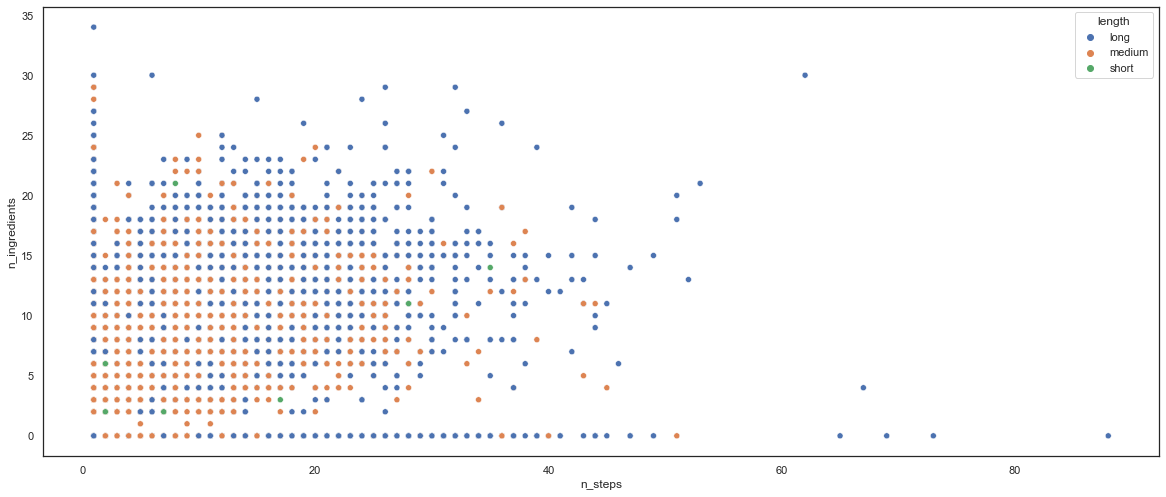

In [205]:
import seaborn as sns
recipes = pd.read_csv('recipes_sample.csv')
recipes['n_ingredients'] = recipes['n_ingredients'].fillna(0)
recipes['n_steps'] = recipes['n_steps'].fillna(1)
mask_short = recipes.minutes < 5
mask_med = (recipes.minutes > 4) & (recipes.minutes < 50)
mask_long = recipes.minutes > 49
masks = [mask_short, mask_med, mask_long]
len_names = ['short', 'medium', 'long']
dfs = [recipes[masks[0]], recipes[masks[1]], recipes[masks[2]]]
for i in range(len(dfs)):
    dfs[i].loc[:, 'length'] = len_names[i]
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("white")
res = pd.concat(dfs).sort_index()
sns.scatterplot(data=res, 
                x="n_steps", 
                y="n_ingredients", 
                hue='length')

#### еще один вариант

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
recipes = pd.read_csv('recipes_sample.csv')

In [82]:
mask_short = recipes.minutes < 5
mask_med = (recipes.minutes > 4) & (recipes.minutes < 50)
mask_long = recipes.minutes > 49

In [83]:
recipes.loc[mask_short, "duration"] = "короткий"
recipes.loc[mask_med, "duration"] = "средний"
recipes.loc[mask_long, "duration"] = "длинный"

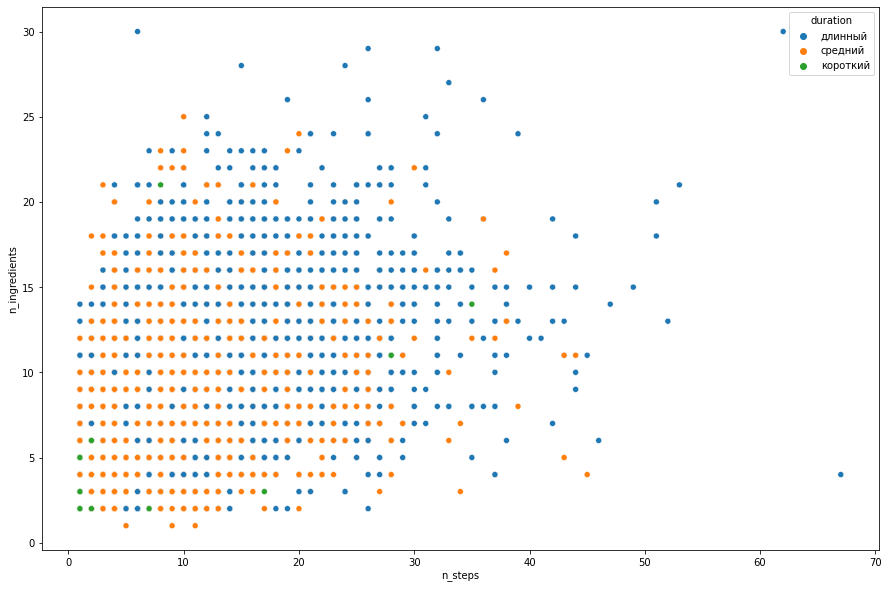

In [84]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=recipes, 
                x="n_steps", 
                y="n_ingredients", 
                hue='duration');

## Пример 1

Датасет: addres-book-q.xml 
По данным из файла addres-book-q.xml сформировать два списка кортежей. В первом будет информация только о мужчинах и кортеж будет состоять из имени, названия компании и рабочего телефона, а во втором списке будет только информация о женщинах и кортеж будет состоять из имени и личного телефона. Сохранить списки в два разных файла формата pickle и загрузить их оттуда.


In [206]:
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
with open("addres-book-q.xml", "r", encoding="utf8") as f:
    data = BeautifulSoup(f)
res_m = []
res_f = []
for person in data.find_all("address"):
    name = person.find('name').get_text()
    if person.find('gender').get_text() == 'm':
        company = person.find('company').get_text()
        phone = person.find('phone', type='work').get_text()
    #phones = [phone.get_text() for phone in person.find_all("phone")]
        res_m.append([name, company, phone])
    if person.find('gender').get_text() == 'f':
        phone = person.find('phone', type='personal').get_text()
        res_f.append([name, phone])
res_f

[['Maria Luisa', '+ (244) 4232 2836'],
 ['Francesca Beddie', '+ (61-2) 6274 9513']]

In [207]:
import pickle
with open('male.pkl', 'wb') as file:
    pickle.dump(res_m, file)
with open('female.pkl', 'wb') as file:
    pickle.dump(res_f, file)

In [208]:
with open('male.pkl', 'rb') as file:
    myvar = pickle.load(file)
    print(myvar)

[['Aicha Barki', "Association Algerienne d'Alphabetisation Iqraa", '+ (213) 6150 4015'], ['Francisco Domingos', 'Institut National de Education des Adultes', '+ (244-2) 325 023'], ['Abraao Chanda', 'Institut National de Education des Adultes', '+ (244-2) 325 023'], ['Beatriz Busaniche', 'Universidad de Buenos Aires', '+ (54-11) 4784 1159'], ['Graham John Smith', 'Disability Australia Ltd', '+ (61-3) 9807 4702']]


In [209]:
with open('female.pkl', 'rb') as file:
    myvar = pickle.load(file)
    print(myvar)

[['Maria Luisa', '+ (244) 4232 2836'], ['Francesca Beddie', '+ (61-2) 6274 9513']]


#### еще один вариант

In [11]:
import requests
from bs4 import BeautifulSoup

In [12]:
with open('addres-book-q.xml') as f:
    df_xml = BeautifulSoup(f, 'xml')

In [13]:
male_list = list()
female_list = list()

for person in df_xml.address_book.find_all("address"):
    if person.find('gender').next == 'm':
        male_list.append(
                 (person.find('name').next,person.company.next,person.find("phone",attrs={'type': 'work'}))
        
    ) 
    else:
        female_list.append(
             (person.find('name').next,person.company.next,person.find("phone",attrs={'type': 'personal'}))

        )

In [14]:
#Список из кортежей для мужчин
male_list

[('Aicha Barki',
  "Association Algerienne d'Alphabetisation Iqraa",
  <phone type="work">+ (213) 6150 4015</phone>),
 ('Francisco Domingos',
  'Institut National de Education des Adultes',
  <phone type="work">+ (244-2) 325 023</phone>),
 ('Abraao Chanda',
  'Institut National de Education des Adultes',
  <phone type="work">+ (244-2) 325 023</phone>),
 ('Beatriz Busaniche',
  'Universidad de Buenos Aires',
  <phone type="work">+ (54-11) 4784 1159</phone>),
 ('Graham John Smith',
  'Disability Australia Ltd',
  <phone type="work">+ (61-3) 9807 4702</phone>)]

In [15]:
#Список из кортежей для женщин
female_list

[('Maria Luisa',
  'Institut National de Education des Adultes',
  <phone type="personal">+ (244) 4232 2836</phone>),
 ('Francesca Beddie',
  'Adult Learning Australia',
  <phone type="personal">+ (61-2) 6274 9513</phone>)]

In [16]:
import pickle

In [17]:
with open('male_list.pickle', 'wb') as handle:
    pickle.dump(male_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open('male_list.pickle', 'rb') as handle:
    male_ = pickle.load(handle)

In [19]:
male_

[('Aicha Barki',
  "Association Algerienne d'Alphabetisation Iqraa",
  <phone type="work">+ (213) 6150 4015</phone>),
 ('Francisco Domingos',
  'Institut National de Education des Adultes',
  <phone type="work">+ (244-2) 325 023</phone>),
 ('Abraao Chanda',
  'Institut National de Education des Adultes',
  <phone type="work">+ (244-2) 325 023</phone>),
 ('Beatriz Busaniche',
  'Universidad de Buenos Aires',
  <phone type="work">+ (54-11) 4784 1159</phone>),
 ('Graham John Smith',
  'Disability Australia Ltd',
  <phone type="work">+ (61-3) 9807 4702</phone>)]

In [20]:
with open('female_list.pickle', 'wb') as handle:
    pickle.dump(female_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
with open('female_list.pickle', 'rb') as handle:
    female_ = pickle.load(handle)

In [22]:
female_

[('Maria Luisa',
  'Institut National de Education des Adultes',
  <phone type="personal">+ (244) 4232 2836</phone>),
 ('Francesca Beddie',
  'Adult Learning Australia',
  <phone type="personal">+ (61-2) 6274 9513</phone>)]

#### еще один вариант

In [85]:
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
with open("addres-book-q.xml", "r", encoding="utf8") as f:
    data = BeautifulSoup(f)
res_m = []
res_f = []
for person in data.find_all("address"):
    name = person.find('name').get_text()
    if person.find('gender').get_text() == 'm':
        company = person.find('company').get_text()
        phone = person.find('phone', type='work').get_text()
    #phones = [phone.get_text() for phone in person.find_all("phone")]
        res_m.append([name, company, phone])
    if person.find('gender').get_text() == 'f':
        phone = person.find('phone', type='personal').get_text()
        res_f.append([name, phone])
res_m

[['Aicha Barki',
  "Association Algerienne d'Alphabetisation Iqraa",
  '+ (213) 6150 4015'],
 ['Francisco Domingos',
  'Institut National de Education des Adultes',
  '+ (244-2) 325 023'],
 ['Abraao Chanda',
  'Institut National de Education des Adultes',
  '+ (244-2) 325 023'],
 ['Beatriz Busaniche', 'Universidad de Buenos Aires', '+ (54-11) 4784 1159'],
 ['Graham John Smith', 'Disability Australia Ltd', '+ (61-3) 9807 4702']]

In [86]:
import pickle
with open('male.pkl', 'wb') as file:
    pickle.dump(res_m, file)
with open('female.pkl', 'wb') as file:
    pickle.dump(res_f, file)

In [87]:
with open('male.pkl', 'rb') as file:
    myvar = pickle.load(file)
    print(myvar)

[['Aicha Barki', "Association Algerienne d'Alphabetisation Iqraa", '+ (213) 6150 4015'], ['Francisco Domingos', 'Institut National de Education des Adultes', '+ (244-2) 325 023'], ['Abraao Chanda', 'Institut National de Education des Adultes', '+ (244-2) 325 023'], ['Beatriz Busaniche', 'Universidad de Buenos Aires', '+ (54-11) 4784 1159'], ['Graham John Smith', 'Disability Australia Ltd', '+ (61-3) 9807 4702']]


In [88]:
with open('female.pkl', 'rb') as file:
    myvar = pickle.load(file)
    print(myvar)

[['Maria Luisa', '+ (244) 4232 2836'], ['Francesca Beddie', '+ (61-2) 6274 9513']]


## Пример 2

Датасет: Chinook_Sqlite.sqlite 
С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая по имени исполнителя возвращает все его альбомы. 
2. Которая по имени исполнителя и имени альбома возвращает количество треков в альбоме и их суммарную продолжительность.


In [89]:
import sqlite3

In [90]:
con = sqlite3.connect("Chinook_Sqlite.sqlite")

In [91]:
cur = con.cursor()

In [92]:
sql = "SELECT * FROM sqlite_master where type='table';"
cur.execute(sql).fetchall()

[('table',
  'Album',
  'Album',
  2,
  'CREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)'),
 ('table',
  'Artist',
  'Artist',
  3,
  'CREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)'),
 ('table',
  'Customer',
  'Customer',
  4,
  'CREATE TABLE [Customer]\n(\n    [CustomerId] INTEGER  NOT NULL,\n    [FirstName] NVARCHAR(40)  NOT NULL,\n    [LastName] NVARCHAR(20)  NOT NULL,\n    [Company] NVARCHAR(80),\n    [Address] NVARCHAR(70),\n    [City] NVARCHAR(40),\n    [State] NVARCHAR(40),\n    [Country] NVARCHAR(40),\n    [PostalCode] NVARCHAR(10),\n    [Phone] NVARCHAR(24),\n    [Fax] NVARCHAR(24),\n    [Email] NVARCHAR(60)  NOT NULL,\n    [SupportRepI

In [93]:
name = "AC/DC"
sql = """
SELECT album.*
FROM artist
LEFT JOIN album
ON artist.ArtistId = album.ArtistId
WHERE artist.name = (?)
"""

cur.execute(sql, (name,)).fetchall()

[(1, 'For Those About To Rock We Salute You', 1), (4, 'Let There Be Rock', 1)]

In [94]:
name = "AC/DC"
album = "For Those About To Rock We Salute You"
sql = """
SELECT count(track.trackid), SUM(track.Milliseconds)
FROM artist
LEFT JOIN album
ON artist.ArtistId = album.ArtistId
LEFT JOIN track
ON album.AlbumId = track.AlbumId
WHERE artist.name = (?) AND album.title = (?)
"""

cur.execute(sql, (name, album)).fetchall()

[(10, 2400415)]

## Пример 3

Датасет: себестоимостьА_в1.xlsx 
С помощью кода на Python с использованием xlwings решить задачу. В верхней таблице для строки "Средний физический расход ресурсов" пересчитать значения и сделать их равными среднему значению по рецептурам, содержащимся в данной таблице.


In [211]:
import xlwings as xw
import csv
import pandas as pd
from xlwings.constants import AutoFillType
app = xw.App(visible=False)
wb = xw.Book('себестоимостьА_в1.xlsx')
ws = wb.sheets['Рецептура']
ws.range('G15').formula = '''=IFERROR(AVERAGE(G7:G10), 0)'''
ws.range('G15').api.AutoFill(ws.range(f'G15:R15').api,
                               AutoFillType.xlFillDefault)
wb.save()

## Пример 4

Необходимо найти все целые числа от 1 до 400 000, для которых sin от этого числа будет иметь не менее 9 одинаковых цифр (например, sin(139198)=0.30763333543133703; sin(139198)=0.30763333543133703 т.е. имеет 9 троек). Ответ представляет собой список пар (целое число, значение синуса для него), для которых значение синуса удовлетворяет условию.
Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.


In [7]:
import math
from collections import Counter
def find_sin(a):
    if Counter(list(str(math.sin(a)))).most_common()[0][1]>=9:
        res.append({a:math.sin(a)})

In [8]:
%%time
res = []
for i in range(1, 400001):
    find_sin(i)
res

Wall time: 2.19 s


[{1797: 0.009002025051800673},
 {3775: -0.9299841096999939},
 {7089: 0.9999926930119999},
 {10639: 0.9999937999413936},
 {24074: 0.024502006300003643},
 {25904: -0.9999975242999319},
 {31249: 0.4097000800060077},
 {36693: -0.7188828881448883},
 {38968: -0.31007805001001504},
 {46617: 0.8881880887188651},
 {47105: -0.04023706000105806},
 {47306: -0.10200005360030799},
 {48979: 0.9999999646773939},
 {50399: 0.9999999894564097},
 {50754: -0.9999999933794586},
 {51109: 0.9999999963938254},
 {51464: -0.9999999984995102},
 {51819: 0.999999999696513},
 {52174: -0.9999999999848337},
 {52529: 0.9999999993644724},
 {52884: -0.999999997835429},
 {53239: 0.9999999953977037},
 {53594: -0.9999999920512962},
 {54609: 0.9649091969997949},
 {54659: 0.9999999765599817},
 {55724: -0.9999999528905291},
 {58564: -0.9999998497899818},
 {60694: -0.999999734299931},
 {63525: 0.9107300260000201},
 {66374: -0.9999992663984799},
 {67490: 0.7412811211116511},
 {78444: -0.9999974997289492},
 {97284: 0.991702941599

In [9]:
%%file sin_.py
import math
from collections import Counter
res = []
mask = []
def find_sin(a):
    mask.append(Counter(list(str(math.sin(a)))).most_common()[0][1]>=9)
    res.append({a:math.sin(a)})
    return mask, res
    #if Counter(list(str(math.sin(a)))).most_common()[0][1]>=9:
    #    return({a:math.sin(a)})
    #else:
    #    return None

Overwriting sin_.py


In [ ]:
%%time
import multiprocessing as mp
from sin_ import find_sin
pool = mp.Pool(4)
results = [pool.apply(find_sin, args=(x,)) for x in range(1,400001)]
output = [p.get() for p in results]

Exception in thread Thread-8:
Traceback (most recent call last):
  File "D:\anaconda\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\anaconda\lib\multiprocessing\pool.py", line 576, in _handle_results
    task = get()
  File "D:\anaconda\lib\multiprocessing\connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "D:\anaconda\lib\multiprocessing\connection.py", line 318, in _recv_bytes
    return self._get_more_data(ov, maxsize)
  File "D:\anaconda\lib\multiprocessing\connection.py", line 344, in _get_more_data
    f.write(ov.getbuffer())
MemoryError


In [ ]:
from itertools import compress
a = [{'fd':'fd'}, {'kkj':'gff'}, {'sd':'as'}]
mask = [True, False, True] 
list(compress(a, mask))

In [ ]:
%%file find_sin_.py
import math
from collections import Counter
from multiprocessing import Pool, Queue
def find_(n):
    return (n,math.sin(n))
def check(a):
    return (Counter(list(str(math.sin(a)))).most_common()[0][1]>=9)
#def foo(n: int, Queue: queue):
#    sin_n = math.sin(n)
#    if Counter(list(str(math.sin(a)))).most_common()[0][1]>=9:
#        queue.put((n, sin_n))
#    return queue

In [ ]:
import math
from collections import Counter
from multiprocessing import Pool, Queue
import multiprocessing as mp
from find_sin_ import find_, check
from itertools import compress
#queue = Queue()

#with Pool(4) as pool:
    #results = [pool.apply_async(foo, args=(x, queue)) for x in range(1, 400001)]
    #output = [p.get() for p in results]
    #pool.map(foo, args = (range(1, 400001), queue))
#print(output)
#print(queue)
#while not queue.empty():
#    print(queue.get())
pool = mp.Pool(processes=4)
results = [pool.apply_async(check, args=(x,)) for x in range(1, 400001)]
output = [p.get() for p in results]
mask = list(compress(list(range(1, 400001)), output))
results = [pool.apply_async(find_, args=(x,)) for x in mask]
output = [p.get() for p in results]

In [ ]:
print(output)

In [ ]:
from itertools import compress
list(compress(list(range(1, 400001)), output))

#### еще один вариант

In [95]:
from collections import Counter
import multiprocessing as mp

In [96]:
%%file checker.py
from collections import Counter
import numpy as np
def checker(x):
    return Counter(list(str(np.sin(x)))).most_common()[0][1]>=9

Writing checker.py


In [97]:
from checker import checker

In [98]:
target = np.arange(1,400_001)
res = []
for x in target:
    if checker(x):
        res.append(x)
np.array(res)

array([  1797,   3775,   7089,  10639,  24074,  25904,  31249,  36693,
        38968,  46617,  47105,  47306,  48979,  50399,  50754,  51109,
        51464,  51819,  52174,  52529,  52884,  53239,  53594,  54609,
        54659,  55724,  58564,  60694,  63525,  66374,  67490,  78444,
        97284, 102540, 106112, 106577, 109962, 112147, 130607, 139198,
       143387, 144452, 145080, 148669, 148712, 149067, 151907, 152617,
       154392, 154747, 155080, 155102, 155812, 156167, 156522, 156877,
       159717, 160072, 160427, 169970, 170722, 178220, 181317, 194474,
       198335, 204419, 211181, 214343, 229286, 234368, 236642, 238786,
       245096, 245796, 246315, 251285, 255232, 255556, 256490, 256610,
       258220, 259150, 259450, 260160, 260515, 260870, 261225, 262290,
       264973, 265485, 269390, 269826, 273295, 274607, 274849, 277555,
       297790, 303727, 303814, 313522, 336926, 342853, 347823, 348888,
       349598, 355633, 357419, 358828, 360248, 360535, 362241, 363443,
      

In [99]:
target = np.arange(1,400_001)
res = target[mp.Pool(processes=mp.cpu_count()).map(checker, target)]
res

array([  1797,   3775,   7089,  10639,  24074,  25904,  31249,  36693,
        38968,  46617,  47105,  47306,  48979,  50399,  50754,  51109,
        51464,  51819,  52174,  52529,  52884,  53239,  53594,  54609,
        54659,  55724,  58564,  60694,  63525,  66374,  67490,  78444,
        97284, 102540, 106112, 106577, 109962, 112147, 130607, 139198,
       143387, 144452, 145080, 148669, 148712, 149067, 151907, 152617,
       154392, 154747, 155080, 155102, 155812, 156167, 156522, 156877,
       159717, 160072, 160427, 169970, 170722, 178220, 181317, 194474,
       198335, 204419, 211181, 214343, 229286, 234368, 236642, 238786,
       245096, 245796, 246315, 251285, 255232, 255556, 256490, 256610,
       258220, 259150, 259450, 260160, 260515, 260870, 261225, 262290,
       264973, 265485, 269390, 269826, 273295, 274607, 274849, 277555,
       297790, 303727, 303814, 313522, 336926, 342853, 347823, 348888,
       349598, 355633, 357419, 358828, 360248, 360535, 362241, 363443,
      

In [100]:
%%timeit
target = np.arange(1,400_001)
res = []
for x in target:
    if checker(x):
        res.append(x)

3.06 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [101]:
%%timeit
target = np.arange(1,400_001)
res = target[mp.Pool(processes=mp.cpu_count()).map(checker, target)]

2.05 s ± 261 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Задания 2022-2023

## Задание 1

Задан двухмерный массив ar1 размерности (10, 10), состоящий из случайных целых чисел в пределах от 0 до 15. Вычислить разность s_odd - s_even, где s_odd - сумма элементов, стоящих на позиции (x, y), где (x + y) является нечетным числом; s_even - сумма элементов, стоящих на позиции (x, y), где (x + y) является четным числом.
Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек


In [1]:
import numpy as np

In [2]:
#Создаем массив 10x10 с числами от 0 до 15
ar1 = np.random.randint(low=0, high=16, size=(10, 10))
ar1

array([[ 0,  5,  6,  0,  8,  6,  7,  6, 12, 15],
       [11,  8,  1,  1,  6,  5,  5,  4, 10, 11],
       [11,  1, 15, 11,  6, 15,  0,  4, 13,  0],
       [10,  3, 13,  4, 14, 11,  0, 13,  7,  9],
       [ 6,  0, 14, 15, 15,  2,  4, 12, 11, 12],
       [ 9,  4,  9,  3,  4,  7,  8,  9,  3,  9],
       [15,  5, 12,  7,  8,  9, 14,  6, 10,  9],
       [13, 12,  7,  2, 15, 14,  3, 10, 13, 14],
       [ 1,  1,  1,  0,  5,  9,  5,  9,  8, 10],
       [15,  9,  5, 10, 15, 12, 14, 11,  5,  9]])

In [3]:
ar1[::2]

array([[ 0,  5,  6,  0,  8,  6,  7,  6, 12, 15],
       [11,  1, 15, 11,  6, 15,  0,  4, 13,  0],
       [ 6,  0, 14, 15, 15,  2,  4, 12, 11, 12],
       [15,  5, 12,  7,  8,  9, 14,  6, 10,  9],
       [ 1,  1,  1,  0,  5,  9,  5,  9,  8, 10]])

In [4]:
ar1[1::2]

array([[11,  8,  1,  1,  6,  5,  5,  4, 10, 11],
       [10,  3, 13,  4, 14, 11,  0, 13,  7,  9],
       [ 9,  4,  9,  3,  4,  7,  8,  9,  3,  9],
       [13, 12,  7,  2, 15, 14,  3, 10, 13, 14],
       [15,  9,  5, 10, 15, 12, 14, 11,  5,  9]])

In [5]:
#s_even - сумма элементов, стоящих на позиции (x, y), где (x + y) является четным числом
s_even = np.sum([ar1[::2,::2], ar1[1::2,1::2]]) #четн
s_even

411

In [6]:
#s_odd - сумма элементов, стоящих на позиции (x, y), где (x + y) является нечетным числом
s_odd = np.sum([ar1[1::2,::2], ar1[::2,1::2]]) #нечетн
s_odd

384

In [7]:
s_odd - s_even

-27

#### Проверка решения

In [8]:
s_odd_check = 0
s_even_check = 0

for i in range(ar1.shape[0]):
    for j in range(ar1.shape[1]):
        if (np.sum([i,j]) % 2 == 1):
            s_odd_check += ar1[i][j]
        else:
            s_even_check += ar1[i][j]

In [9]:
assert s_odd_check == s_odd

In [10]:
assert s_even_check == s_even_check

## Задание 2

2 Датасет: Chinook_Sqlite.sqlite<br>
С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на
Python:

1 Которая возвращает все имеющиеся жанры.

2 Которая возвращает ID жанров, в которых написано более 100 треков, и их (жанров) название.


In [11]:
import sqlite3

In [12]:
def get_genres(cursor: sqlite3.Cursor) -> list:
    """Функция для получения списка жанров из курсора sqlite3"""
    #Выполняем SQL запрос через курсор
    cursor.execute("SELECT Name FROM Genre")
    #С помощью cur.fetchall() получаем все жанры
    buffer = cursor.fetchall()
    #Возвращаем результат в едином списке
    return [item[0] for item in buffer]

In [13]:
def get_popular_genres_id(cursor: sqlite3.Cursor) -> list:
    """Получение id жанров, в которых написано более 100 треков """
    cursor.execute('''
        SELECT Genre.GenreId, Genre.Name FROM Genre
        LEFT JOIN Track
        ON Genre.GenreId = Track.GenreId
        GROUP BY Genre.GenreId
        HAVING COUNT(Track.GenreId) > 100
    ''')
    return cursor.fetchall()

#### Получение всех имеющихся жанров

In [14]:
connection = sqlite3.connect("./data/Chinook_Sqlite.sqlite")
cursor = connection.cursor()
get_genres(cursor)

['Rock',
 'Jazz',
 'Metal',
 'Alternative & Punk',
 'Rock And Roll',
 'Blues',
 'Latin',
 'Reggae',
 'Pop',
 'Soundtrack',
 'Bossa Nova',
 'Easy Listening',
 'Heavy Metal',
 'R&B/Soul',
 'Electronica/Dance',
 'World',
 'Hip Hop/Rap',
 'Science Fiction',
 'TV Shows',
 'Sci Fi & Fantasy',
 'Drama',
 'Comedy',
 'Alternative',
 'Classical',
 'Opera']

#### Которая возвращает ID жанров, в которых написано более 100 треков, и их (жанров) название.

In [15]:
get_popular_genres_id(cursor)

[(1, 'Rock'),
 (2, 'Jazz'),
 (3, 'Metal'),
 (4, 'Alternative & Punk'),
 (7, 'Latin')]

## Задание 3

Датасет: album_artist.xlsx 

С помощью кода на Python с использованием xlwings решить задачу. Вынести названия артистов на отдельный лист "Артисты" и присвоить каждому артисту уникальный идентификатор. Заменить названия артистов на исходном листе на идентификаторы с листа "Артисты".

In [16]:
import xlwings as xw
from xlwings.constants import AutoFillType

In [196]:
wb = xw.Book('album_artist.xlsx') 
sht = wb.sheets['Sheet1']
sht_artist = wb.sheets.add(name="Артисты")

Берём все уникальные имена артистов 

In [197]:
artist_lst = list(set(sht.range('D2').expand('down').value))
artist_len = len(artist_lst)

Добавляем имена на страницу "Артисты"

In [198]:
sht_artist.range('B1').value = 'Name'
sht_artist.range('B2').options(transpose=True).value = artist_lst

Добавляем ArtistId

In [199]:
sht_artist.range('A1').value = 'ArtistId'
sht_artist.range('A2').options(transpose=True).value = list(range(1, artist_len+1))

In [200]:
# Вставляем значения ArtistId вместо имени артиста на первую страницу
sht.range("D1").value = 'ArtistId'
# в xlwings нужно использовать английское название функий и передавть аргументы через запятую
sht.range("E2").formula = f'=INDEX(Артисты!$A$2:$A${artist_len+1},MATCH(D2,Артисты!$B$2:$B${artist_len+1},0))' 
album_len = sht.range((1, 2)).end('down').row 

sht.range('E2').api.AutoFill(sht.range(f"E2:E{album_len}").api, AutoFillType.xlFillDefault)
sht.range('D2').options(transpose=True).value = sht.range('E2').expand('down').value
sht.range('E2').expand('down').value = ''

## Задание 4

**Датасет: us-countries.csv**

Создайте таблицу, где по строкам располагаются названия штатов, по столбцам - каждый из 12 месяцев 2020 года, а в ячейках таблицы хранится суммарное количество смертей в данном штате в этот месяц. Если информация за какой-то месяц отсутствует, укажите в этой ячейке значение 0.

In [37]:
import pandas as pd
import datetime

In [25]:
# Считываем данные с csv
data = pd.read_csv('us-counties.csv', parse_dates = ['date'])
data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2089614,2022-01-06,Sweetwater,Wyoming,56037.0,8471,110.0
2089615,2022-01-06,Teton,Wyoming,56039.0,6836,14.0
2089616,2022-01-06,Uinta,Wyoming,56041.0,4245,34.0
2089617,2022-01-06,Washakie,Wyoming,56043.0,1908,39.0


In [26]:
# Фильтруем данные на 2020 год
data = data[data['date'].dt.year == 2020]
data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


In [ ]:
# Список месяцев от 1 до 12
months = [i for i in range(1,13)]

# Создаем DataFrame с месяцами в качестве колонок
task_table = pd.DataFrame(columns = months)

for country in pd.unique(data['county']):
    
    # Группируем смерти по месяцам, считаем сумму
    row = data[data['county'] == country]['deaths'].groupby(data['date'].dt.month).sum()
    
    # Добавляем новые данные в таблицу
    task_table.loc[country] = row

# Заполняем 0 всю информацию, которой нет
task_table = task_table.fillna(0)
task_table

## Задание 5

По данным из файла data/meals.json сформировать словарь, в котором по идентификатору блюда можно получить список ингредиентов.

In [18]:
import json

In [54]:
#Читаем json
with open("meals.json", "r") as file:
    data = json.load(file)
data

{'meals': [{'idMeal': '52768',
   'strMeal': 'Apple Frangipan Tart',
   'strDrinkAlternate': None,
   'strCategory': 'Dessert',
   'strArea': 'British',
   'strInstructions': 'Preheat the oven to 200C/180C Fan/Gas 6.\r\nPut the biscuits in a large re-sealable freezer bag and bash with a rolling pin into fine crumbs. Melt the butter in a small pan, then add the biscuit crumbs and stir until coated with butter. Tip into the tart tin and, using the back of a spoon, press over the base and sides of the tin to give an even layer. Chill in the fridge while you make the filling.\r\nCream together the butter and sugar until light and fluffy. You can do this in a food processor if you have one. Process for 2-3 minutes. Mix in the eggs, then add the ground almonds and almond extract and blend until well combined.\r\nPeel the apples, and cut thin slices of apple. Do this at the last minute to prevent the apple going brown. Arrange the slices over the biscuit base. Spread the frangipane filling ev

In [55]:
result_dict = {}
#Инициализируем список для каждого ключа
for item in data["meals"]:
    result_dict[item["idMeal"]]=[]

In [56]:
for item in data["meals"]:
    #Цикл по каждому ключу в словаре
    for key, value in item.items():
        #Если в ключе есть паттерн "strIngredient" и значение не пустое
        if "strIngredient" in key and value not in ["",None]:
            #То добавляем в словарь
            result_dict[item["idMeal"]].append(value)

In [57]:
result_dict["53049"]

['Milk',
 'Oil',
 'Eggs',
 'Flour',
 'Baking Powder',
 'Salt',
 'Unsalted Butter',
 'Sugar',
 'Peanut Butter']

## Задание 6

Датасет: Womens Clothing E-Commerce Reviews.csv Для каждого уникального значения в столбце Division Name найти топ-5 самых часто используемых слов в описании отзыва. Исключить из рассмотрения стоп-слова.

In [62]:
import re
import pandas as pd
from nltk import word_tokenize
import multiprocessing as mp

In [63]:
reviews = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [64]:
reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [65]:
pattern = re.compile(r'[\W]+$')
reviews['tokenized'] = reviews.apply(lambda row: [word for word in word_tokenize(row['Review Text']) if not pattern.match(word)]  if not pd.isna(row['Review Text']) else [], axis=1)
reviews

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,tokenized
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[Absolutely, wonderful, silky, and, sexy, and,..."
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[Love, this, dress, it, 's, sooo, pretty, i, h..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[I, had, such, high, hopes, for, this, dress, ..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[I, love, love, love, this, jumpsuit, it, 's, ..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[This, shirt, is, very, flattering, to, all, d..."
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"[I, was, very, happy, to, snag, this, dress, a..."
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"[It, reminds, me, of, maternity, clothes, soft..."
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"[This, fit, well, but, the, top, was, very, se..."
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"[I, bought, this, dress, for, a, wedding, i, h..."


In [66]:
agg_reviews = reviews.groupby('Division Name')['tokenized'].agg(list)

In [67]:
%%file five_common.py
from collections import Counter
from nltk.corpus import stopwords
from nltk import flatten
def five_common(data):
    line = flatten(data)
    line = list(filter(lambda x: x not in stopwords.words('english'), line))
    counter = Counter(line)
    return (counter.most_common(5))

Writing five_common.py


In [68]:
from five_common import five_common

In [69]:
if __name__ == "__main__":
    with mp.Pool(processes=len(agg_reviews.values)) as pool:
        counters = pool.map(five_common, agg_reviews.values)
    

KeyboardInterrupt: 

In [ ]:
list(zip(agg_reviews.keys(), counters))

## Задание 7

В people.*.csv найти номера карт, сумма цифр в которых кратна 7. Выполнить задание с использованием Dask, распараллелив процесс обработки данных. Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

In [ ]:
import dask.dataframe as dd

dask_table = dd.read_csv('people.0.csv')
append = dd.read_csv('people.1.csv')
dask_table.append(append)
append = dd.read_csv('people.2.csv')
dask_table.append(append)
dask_table.set_index('Unnamed: 0')

In [ ]:
dask_table.filter(lambda x: sum([int(i) for i in x['card']])%7 == 0).compute()

In [ ]:
cards = dask_table.card.to_bag()
cards.filter(lambda x: sum([int(i) for i in x.replace(' ', '')])%7 == 0).compute()

## Задание 8

Подсчитать, сколько раз во всех текстовых файлах, лежащих в каталоге fish, встречаются слова, начинающиеся с прописной буквы. Выполнить задание с использованием Dask

In [ ]:
import dask.bag as db
import re

with open('001.txt', 'r') as file:
    text = file.read()
with open('002.txt', 'r') as file:
    text += file.read()
with open('003.txt', 'r') as file:
    text += file.read()
with open('004.txt', 'r') as file:
    text += file.read()
text = text.split()
text = db.from_sequence(text)
text = text.filter(lambda x: re.match('[a-zа-яё]', x))
text.count().compute()

## Задание 9

Сгенерируйте 10 строк длиной в 10000 символов, состоящих из маленьких английских букв. Посчитайте, сколько раз в этих 10 строках встречается шаблон "x?y?z", где знак вопроса обозначает один любой символ. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.

In [22]:
import random
import re
import string

#### Генерация строк

In [23]:
#Кол-во символов в строке
str_len = 10000
#Кол-во строк
str_count = 10

In [24]:
#Формируем список строк
str_list = []
for _ in range(str_count):
    buffer = ''.join(random.choice(string.ascii_lowercase) for _ in range(str_len))
    str_list.append(buffer)

#### Поиск по шаблону

In [25]:
%%file find_by_pattern.py
import re
def find_by_pattern(data: str) -> int:
    return len(re.findall(r'x.y.z', data))

Writing find_by_pattern.py


In [26]:
from find_by_pattern import find_by_pattern

#### Последовательное выполнение

In [27]:
%%time
for item in str_list:
    find_by_pattern(item)

Wall time: 997 µs


#### Параллельное выполнение

In [29]:
import multiprocessing as mp

In [30]:
%%time
if __name__ == "__main__":
    with mp.Pool(processes=str_count) as pool:
        counters = pool.map(find_by_pattern, str_list)

Wall time: 525 ms


#### Выводы

Паралельное выполнение намного медленнее т.к. re.match достаточно легкая операция, а потоки создавать намного дольше, чем выполнить саму операцию - отсюда и последовательное выполнение быстрее

## Задание 10

Создайте dask.array размерности 10 тыс на 5, заполненный случайными целыми числами на отрезке [0, 10]. Создайте версию этого массива, оставив только строки, в которых есть число 7

In [31]:
import dask.array as da

In [32]:
%%time
arr_da = da.random.randint(low=0, high=11, size=(10_000, 5))
arr_da.compute()

Wall time: 7.98 ms


array([[ 5,  0,  5,  3,  2],
       [ 9,  4,  9,  9,  9],
       [ 2,  7,  5,  8,  3],
       ...,
       [ 0,  6,  0, 10,  8],
       [ 5,  1,  2,  0,  3],
       [ 3,  2,  1,  4,  1]])

In [33]:
result = arr_da[list(filter(lambda x: x > 0, (arr_da[:, :] == 7).any(axis=1).map_blocks(lambda x, n: x * n, list(range(10000))).compute())), :]
result.compute()

array([[ 2,  7,  5,  8,  3],
       [ 9,  0,  3,  7,  7],
       [ 3,  4, 10,  3,  7],
       ...,
       [ 2,  1,  7,  5, 10],
       [ 7,  6,  6,  7,  8],
       [ 1,  8,  5,  7,  5]])

## Задание 11

Дан массив А. Посмтроить массив B той же расмерности, состоящий из элементов, являющихся суммой минимального элемента массива A по соответствующей строке и минимального элемента A по соответствующему столбцу. Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.
A=np.array([[ 8, 4, 15, 6, 9], [3, 16, 13, 8, 10], [ 0, 9, 18, 17, 5], [16, 2, 6, 0, 10], [18, 13, 9, 17, 8]])

In [75]:
import numpy as np

In [76]:
A = np.array([
    [ 8, 4, 15, 6, 9],
    [3, 16, 13, 8, 10],
    [ 0, 9, 18, 17, 5],
    [16, 2, 6, 0, 10],
    [18, 13, 9, 17, 8]]
)

In [77]:
B = np.resize(A.min(axis=1), (5,5)).transpose() + A.min(axis=0)
B

array([[ 4,  6, 10,  4,  9],
       [ 3,  5,  9,  3,  8],
       [ 0,  2,  6,  0,  5],
       [ 0,  2,  6,  0,  5],
       [ 8, 10, 14,  8, 13]])

## Задание 12

Датасет: data/accounts.*csv
В accounts.csv найти id, для которого в столбце amount встречается наибольшее количество значений, кратных трем. Выполнить задание с использованием Dask, распараллелив процесс обработки данных. Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

In [78]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [ ]:
accounts = dd.read_csv("./data/accounts.*.csv")

In [ ]:
result = (accounts["amount"] % 3 == 0).groupby(accounts["id"]).sum().idxmax().compute()
result

## Задание 13

Датасет: Chinook_Sqlite.sqlite
С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функци на Python:
1. Которая возвращает все имеющиеся плейлисты.
2. Которая по имени плейлиста возращает количество треков в нем и их суммарную продолжительность.

In [79]:
import sqlite3


def get_all_playlists(cur: sqlite3.Cursor) -> list:
    stmt = 'SELECT * FROM Playlist'
    return cur.execute(stmt).fetchall()


def get_playlist_n_tracks_sum_milliseconds(cur: sqlite3.Cursor, playlist_name: str) -> list:
    stmt = '''
    SELECT COUNT(T.TrackId), SUM(T.Milliseconds)
    FROM Playlist P
    JOIN PlaylistTrack PT ON P.PlaylistId = PT.PlaylistId
    JOIN Track T ON PT.TrackId = T.TrackId
    WHERE P.Name = ? GROUP BY P.PlaylistId;
    '''
    return cur.execute(stmt, [playlist_name]).fetchall()


con = sqlite3.connect('Chinook_Sqlite.sqlite')
cur = con.cursor()

In [80]:
#вопрос 2 1 пункт
get_all_playlists(cur)

[(1, 'Music'),
 (2, 'Movies'),
 (3, 'TV Shows'),
 (4, 'Audiobooks'),
 (5, '90’s Music'),
 (6, 'Audiobooks'),
 (7, 'Movies'),
 (8, 'Music'),
 (9, 'Music Videos'),
 (10, 'TV Shows'),
 (11, 'Brazilian Music'),
 (12, 'Classical'),
 (13, 'Classical 101 - Deep Cuts'),
 (14, 'Classical 101 - Next Steps'),
 (15, 'Classical 101 - The Basics'),
 (16, 'Grunge'),
 (17, 'Heavy Metal Classic'),
 (18, 'On-The-Go 1')]

In [81]:
#вопрос 2 2 пункт
get_playlist_n_tracks_sum_milliseconds(cur, 'Music')

[(3290, 877683083), (3290, 877683083)]

## Задание 14

Необходимо найти все пары целых чисел от 1 до 3000, для которых sin от произведения чисел из пары будет иметь занчение больше 0.99999999 (например, sin(237*1544)=0.99999999951152019>0.99999999;
sin(237*1544)=0.99999999951152019>0.99999999).
Ответ представляет собой список пар (целое число1, целое число2, значение синуса для из произведения), для которых значение синуса удовлетворяет условию.
Решение этой задачи распараллелить, использую multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи. 

In [82]:
import math

value = 0.99999999
l = 1
r = 3000

In [83]:
%%time

matr = ((i, j,math.sin(i*j)) for i in range(l,r) for j in range (l, r))
res = list(filter(lambda x: math.sin(x[0]*x[1]) > value, matr))
print(res)

[(23, 2253, 0.999999999696513), (57, 2746, 0.9999999998635031), (62, 2536, 0.9999999970500172), (69, 751, 0.999999999696513), (91, 2855, 0.9999999980220771), (114, 1373, 0.9999999998635031), (115, 2253, 0.9999999924128237), (124, 1268, 0.9999999970500172), (129, 2025, 0.9999999983363994), (133, 2746, 0.99999999925685), (135, 1935, 0.9999999983363994), (157, 1006, 0.9999999906018032), (158, 2316, 0.9999999951152019), (193, 1896, 0.9999999951152019), (194, 2951, 0.9999999982003109), (209, 2746, 0.9999999981648745), (215, 1215, 0.9999999983363994), (219, 2149, 0.9999999901999105), (222, 2582, 0.9999999999999568), (225, 1161, 0.9999999983363994), (227, 2522, 0.9999999982003109), (237, 1544, 0.9999999951152019), (241, 2807, 0.9999999968696842), (243, 1075, 0.9999999983363994), (248, 634, 0.9999999970500172), (266, 1373, 0.99999999925685), (267, 2531, 0.9999999902820274), (269, 1739, 0.9999999948839151), (271, 2880, 0.999999995173126), (285, 2746, 0.9999999965875765), (288, 2710, 0.999999995

In [84]:
%%file f.py

import math 

def f(x):
    value = 0.99999999
    if math.sin(x[0]*x[1]) > value:
        return x

Writing f.py


In [85]:
from multiprocessing import Pool
import multiprocessing as mp
from f import f

with Pool(processes=mp.cpu_count()) as pool:
    res = pool.map(f, ((i,j,math.sin(i*j)) for i in range(l,r) for j in range(l,r)))
    
list(filter(lambda x: x is not None, res))

[(23, 2253, 0.999999999696513),
 (57, 2746, 0.9999999998635031),
 (62, 2536, 0.9999999970500172),
 (69, 751, 0.999999999696513),
 (91, 2855, 0.9999999980220771),
 (114, 1373, 0.9999999998635031),
 (115, 2253, 0.9999999924128237),
 (124, 1268, 0.9999999970500172),
 (129, 2025, 0.9999999983363994),
 (133, 2746, 0.99999999925685),
 (135, 1935, 0.9999999983363994),
 (157, 1006, 0.9999999906018032),
 (158, 2316, 0.9999999951152019),
 (193, 1896, 0.9999999951152019),
 (194, 2951, 0.9999999982003109),
 (209, 2746, 0.9999999981648745),
 (215, 1215, 0.9999999983363994),
 (219, 2149, 0.9999999901999105),
 (222, 2582, 0.9999999999999568),
 (225, 1161, 0.9999999983363994),
 (227, 2522, 0.9999999982003109),
 (237, 1544, 0.9999999951152019),
 (241, 2807, 0.9999999968696842),
 (243, 1075, 0.9999999983363994),
 (248, 634, 0.9999999970500172),
 (266, 1373, 0.99999999925685),
 (267, 2531, 0.9999999902820274),
 (269, 1739, 0.9999999948839151),
 (271, 2880, 0.999999995173126),
 (285, 2746, 0.9999999965875

In [86]:
%%time

with Pool(processes=mp.cpu_count()) as pool:
    res = pool.map(f, ((i,j,math.sin(i*j)) for i in range(l,r) for j in range(l,r)))
    
list(filter(lambda x: x is not None, res))

Wall time: 20.5 s


[(23, 2253, 0.999999999696513),
 (57, 2746, 0.9999999998635031),
 (62, 2536, 0.9999999970500172),
 (69, 751, 0.999999999696513),
 (91, 2855, 0.9999999980220771),
 (114, 1373, 0.9999999998635031),
 (115, 2253, 0.9999999924128237),
 (124, 1268, 0.9999999970500172),
 (129, 2025, 0.9999999983363994),
 (133, 2746, 0.99999999925685),
 (135, 1935, 0.9999999983363994),
 (157, 1006, 0.9999999906018032),
 (158, 2316, 0.9999999951152019),
 (193, 1896, 0.9999999951152019),
 (194, 2951, 0.9999999982003109),
 (209, 2746, 0.9999999981648745),
 (215, 1215, 0.9999999983363994),
 (219, 2149, 0.9999999901999105),
 (222, 2582, 0.9999999999999568),
 (225, 1161, 0.9999999983363994),
 (227, 2522, 0.9999999982003109),
 (237, 1544, 0.9999999951152019),
 (241, 2807, 0.9999999968696842),
 (243, 1075, 0.9999999983363994),
 (248, 634, 0.9999999970500172),
 (266, 1373, 0.99999999925685),
 (267, 2531, 0.9999999902820274),
 (269, 1739, 0.9999999948839151),
 (271, 2880, 0.999999995173126),
 (285, 2746, 0.9999999965875

Вывод: на процессах дольше на секунду, потому что задача тривиальна и тратится намного больше времени только на то, чтобы запустить планировщик mp для pool и прочие задачи.

## Задание 15

Есть файл "sp500.txt" с акциями. Необходимо отфильтровать акции 2010 года, сгруппировать по тикеру(компании) и найти средние значения для столбцов 3-6. Сохранить конечную таблицу в формате csv

In [88]:
import pandas as pd

data = pd.read_csv('sp500hst.txt', header=None, parse_dates=[0])
data

,0,1,2,3,4,5,6
0,2009-08-21,A,25.60,25.6100,25.220,25.55,34758
1,2009-08-24,A,25.64,25.7400,25.330,25.50,22247
2,2009-08-25,A,25.50,25.7000,25.225,25.34,30891
3,2009-08-26,A,25.32,25.6425,25.145,25.48,33334
4,2009-08-27,A,25.50,25.5700,25.230,25.54,70176
...,...,...,...,...,...,...,...
122569,2010-08-13,ZMH,51.72,51.9000,51.380,51.44,14561
122570,2010-08-16,ZMH,51.13,51.4700,50.600,51.00,13489
122571,2010-08-17,ZMH,51.14,51.6000,50.890,51.21,20498
122572,2010-08-19,ZMH,51.63,51.6300,50.170,50.22,18259


In [89]:
result = data[data[0].dt.year==2010][range(2,6)].groupby(data[1]).mean()
result

,2,3,4,5
1,,,,
A,31.473145,31.820904,31.056062,31.460031
AA,12.787075,12.963261,12.546303,12.739997
AAPL,237.969647,240.403196,234.474566,237.678406
ABC,29.627799,29.901896,29.265980,29.618428
ABT,51.148553,51.488866,50.677244,51.117987
...,...,...,...,...
XTO,45.986281,46.340121,45.567788,45.955537
YHOO,15.703544,15.906368,15.494622,15.697168
YUM,38.980440,39.371889,38.605597,39.021887


In [ ]:
result.to_csv('task2_result.csv')

## Задание 16

Датасет: all_k.zip 
Подсчитать, сколько раз во всех текстовых файлах лежащих в all_k.zip встречаются реплики прямой речи, оформленные в виде диалога 
(В этом случае каждая реплика начинается с новой строки, перед репликами ставится тире (перед тиревозможны различные пробельные символы). Выполнить задание с использованием Dask, распараллелив процесс обработки данных. 
 Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных(использование Dask должно приводить к истинной параллельной обработке данных)    

In [8]:
import dask.bag as db
import re

def counter(data):
    return len(re.findall(r'^\s*[—–-]', data))

bag = db.read_text(urlpath='all_k.zip/*', encoding='Windows-1251')
bag.map(counter).sum().compute()

ValueError: ('No files found', 'all_k.zip/*')

## Задание 17

Датасет sp500hst.txt
    
Для тикера NVDA посчитать, сколько дней прошло между максимальным и минимальным значением цены акции открытий рынка, и суммарный объем торгов за этот период (включая дни максимума и минимума). 
Решить задачу средствами numpy/pandas. Не использовать циклы и конструкции страндартного Python там, где можно использовать возможности данных библиотек.

In [102]:
import pandas as pd
columns = ['date', 'ticker', 'open','max_price','min_price','close','volume']

ticker_df = pd.read_csv("sp500hst.txt", names=columns, parse_dates=['date'])
ticker_df

,date,ticker,open,max_price,min_price,close,volume
0,2009-08-21,A,25.60,25.6100,25.220,25.55,34758
1,2009-08-24,A,25.64,25.7400,25.330,25.50,22247
2,2009-08-25,A,25.50,25.7000,25.225,25.34,30891
3,2009-08-26,A,25.32,25.6425,25.145,25.48,33334
4,2009-08-27,A,25.50,25.5700,25.230,25.54,70176
...,...,...,...,...,...,...,...
122569,2010-08-13,ZMH,51.72,51.9000,51.380,51.44,14561
122570,2010-08-16,ZMH,51.13,51.4700,50.600,51.00,13489
122571,2010-08-17,ZMH,51.14,51.6000,50.890,51.21,20498
122572,2010-08-19,ZMH,51.63,51.6300,50.170,50.22,18259


In [91]:
ticker_df.dtypes

date         datetime64[ns]
ticker               object
open                float64
max_price           float64
min_price           float64
close               float64
volume                int64
dtype: object

In [92]:
max_df = ticker_df.groupby('ticker').max()[['date','open']]

In [93]:
min_df = ticker_df.groupby('ticker').min()[['date','open']]

In [94]:
res1 = max_df['date'] - min_df['date'] # кол-во дней
res1

ticker
A      364 days
AA     364 days
AAPL   364 days
ABC    364 days
ABT    364 days
         ...   
XTO    308 days
YHOO   364 days
YUM    364 days
ZION   364 days
ZMH    364 days
Name: date, Length: 524, dtype: timedelta64[ns]

In [95]:
min_df[min_df.index == "A"]['date'] > '2009-08-22'

ticker
A    False
Name: date, dtype: bool

In [96]:
def getMin(x):
    #print(min_df[min_df.index == x['ticker'][0]]['date'][0])
    #print("getMin",x['date']>min_df[min_df.index == x['ticker'][0]]['date'][0])
    return x['date']>min_df[min_df.index == x['ticker'][0]]['date'][0]

In [111]:
ticker_df['ticker']

0           A
1           A
2           A
3           A
4           A
         ... 
122569    ZMH
122570    ZMH
122571    ZMH
122572    ZMH
122573    ZMH
Name: ticker, Length: 122574, dtype: object

In [121]:
ticker_df.groupby(['ticker'])['max_price']

In [123]:
# df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
#                                'Parrot', 'Parrot'],
#                     'Max Speed': [380., 370., 24., 26.]})
# print(df)
# df.groupby(['Animal'])['Max Speed']

In [122]:
grouped = ticker_df.groupby('ticker')
grouped.filter(lambda x: getMin(x))

TypeError: filter function returned a Series, but expected a scalar bool

## Задание 18

В массиве чисел, хранящихся в файле random.hdf5, посчитать долю значений, превышающих среднее значение более чем на 3 стандартных отклонения. Выполнить задание с использованием dask.array, распараллелив процесс обработки данных (использование Dask должна приводить к истинной параллельной обработке данных).

In [125]:
import h5py
import dask.array as da

f = h5py.File('random.hdf5', 'r')
dataset = f['data_set_1']
print(dataset)

da_set = da.from_array(dataset, chunks=(1000, 1000))

<HDF5 dataset "data_set_1": shape (1000, 100000), type "<f8">


In [126]:
da_set[abs(da_set - da_set.mean()) > 3*np.std(da_set)].compute()

array([-3.16995493, -3.08329195, -3.26213976, ...,  3.18450737,
        3.45144948, -3.06750822])

## Задание 19

Определить 200 самых частотных слов в тексте (вывести на экран эти слова и их частоты). Среди найденных слов определить слова, не входящие в стандарнтых список стоп-слов.
Вывести эти слова на экран

In [127]:
#Импорт либ
import re
from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk import flatten
from typing import List, Tuple

In [128]:
stopwords_set = set(stopwords.words('russian'))
custom_stop_set = {"«","»"}
#Добавляем во множество кастомные кавычки
stopwords_set = stopwords_set | custom_stop_set

In [129]:
def most_common(data : list, count: int) -> List[Tuple[str, int]]:
    """Самые встречающиеся слова"""
    buffer = flatten(data)
    buffer = list(filter(lambda item: item not in stopwords_set, buffer))
    counter = Counter(buffer)
    return counter.most_common(count)

In [130]:
#Чтение файла
with open("AnnaKarenina_.txt", "r", encoding="windows-1251") as f:
    data = f.readlines()

In [131]:
words_list = []
#Регулярка, чтоб выкинуть лишние символы
pattern = re.compile(r"[^a-zA-ZA-ЯЁа-яё ]+")
for item in data:
    buffer = re.sub(pattern, '', item.lower())
    words_list.append(word_tokenize(buffer))

In [132]:
most_common(words_list, 200)

#Тут надо как-то на русском сделать еще лемматизацию, но nltk в это не может, а я не помню какая там библиотека для этого нужна
#Но там 3 шага:
#1) Импорт метода с библиотеки
#2) Выставление русского языка
#3) Метод, где на вход принимается str, на выходе str с лемматизацией

[('это', 2222),
 ('сказал', 1411),
 ('левин', 1135),
 ('сказала', 827),
 ('кити', 661),
 ('очень', 573),
 ('вронский', 509),
 ('анна', 499),
 ('алексей', 429),
 ('степан', 423),
 ('аркадьич', 422),
 ('александрович', 395),
 ('время', 366),
 ('мог', 357),
 ('говорил', 357),
 ('руку', 309),
 ('долли', 302),
 ('которые', 295),
 ('чтото', 291),
 ('лицо', 277),
 ('сказать', 276),
 ('дело', 272),
 ('левина', 272),
 ('который', 263),
 ('своей', 251),
 ('знал', 249),
 ('жизни', 235),
 ('говорить', 234),
 ('знаю', 233),
 ('которое', 231),
 ('пред', 224),
 ('хотел', 219),
 ('сергей', 219),
 ('нужно', 217),
 ('человек', 215),
 ('прежде', 215),
 ('глаза', 214),
 ('могу', 214),
 ('видел', 214),
 ('тебе', 213),
 ('тотчас', 211),
 ('чувствовал', 210),
 ('вронского', 204),
 ('одно', 202),
 ('своего', 199),
 ('могла', 199),
 ('свое', 198),
 ('иванович', 191),
 ('думал', 189),
 ('глядя', 189),
 ('говорила', 183),
 ('вместе', 183),
 ('отвечал', 182),
 ('нему', 180),
 ('улыбаясь', 178),
 ('которая', 178),

## Задание 20

В accounts.*.csv найти id, для которого сумма положительных значений в столбце amount наибольшая. Выполнить задание с использованием dask, распараллелив процесс обработки данных.

In [133]:
import dask.dataframe as dd

In [135]:
accounts = dd.read_csv('accounts.*.csv',
                       dtype= {'amount': 'float64', 'id': 'int64', 'names': 'object'})
#Проверка на то, правильные ли мы тпы указали в dtype
accounts.head()
accounts.tail()

,id,names,amount
999995,43,Dan,933.0
999996,431,Wendy,4913.0
999997,168,Hannah,323.0
999998,308,Norbert,-14.0
999999,353,Ingrid,366.0


In [136]:
#Оставляем только положителньые значения
accounts_fixed = accounts[accounts["amount"] > 0]
accounts_fixed.tail()

,id,names,amount
999994,131,George,153.0
999995,43,Dan,933.0
999996,431,Wendy,4913.0
999997,168,Hannah,323.0
999999,353,Ingrid,366.0


In [137]:
max_id = accounts_fixed.groupby('id')['amount'].sum().idxmax().compute()
max_id

165

#### Проверка на адекватность

In [138]:
check = accounts_fixed.groupby('id').sum().sort_values("amount").compute()
check

,amount
id,
250,7.0
28,13.0
437,35.0
442,62.0
141,271.0
...,...
62,94258507.0
49,114515412.0
113,115465183.0


## Задание 21

Создать таблицу, в которой индексом являются даты торгов, столбцами - наименования тикеров, а в ячейках хранятся объёмы торгов. Заполнить эту таблицу данными из sp500hst.txt (в случае отсутствия инфомрации для определенных сочетаний тикер-дата, сохранить я ячейке пустое значение). Сохранить результат в новый CSV файл. Решить задачу средствами numpy и/или pandas. Не использовать циклы и нострукции стандартного python там, где можно использовать возможности данных библиотек.

In [139]:
import pandas as pd

In [141]:
df = pd.read_csv('sp500hst.txt', names=['date', 'ticker', 'open', 'high', 'low', 'close', 'volume'], header = None)

df['date'] = pd.to_datetime(df['date'], format="%Y%m%d")
df.head()

dates = df['date'].unique()
tickers = df['ticker'].unique()
ndf = pd.DataFrame(columns=tickers)
ndf['date'] = dates
ndf.set_index('date', inplace=True)


In [142]:
for d in dates:
    ndf.loc[d] = df[df['date']==d].groupby('ticker')['volume'].sum()

In [144]:
ndf.to_csv('t2.csv')

#### еще один вариант

In [8]:
df = pd.read_csv(
    'sp500hst.txt',
    sep=',',
    header=None,
    names=['date', 'ticker', *[f'what_is_{i}' for i in range(4)], 'vol']
)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,ticker,what_is_0,what_is_1,what_is_2,what_is_3,vol
0,2009-08-21,A,25.60,25.6100,25.220,25.55,34758
1,2009-08-24,A,25.64,25.7400,25.330,25.50,22247
2,2009-08-25,A,25.50,25.7000,25.225,25.34,30891
3,2009-08-26,A,25.32,25.6425,25.145,25.48,33334
4,2009-08-27,A,25.50,25.5700,25.230,25.54,70176


In [9]:
pivot_table = df.pivot_table(
    'vol',
    index=df['date'].rename(None),
    columns=df['ticker'].rename(None),
)
pivot_table.to_csv('21_2.csv')
pivot_table.head()

,A,AA,AAPL,ABC,ABT,ACE,ACS,ADBE,ADI,ADM,...,XL,XLNX,XOM,XRAY,XRX,XTO,YHOO,YUM,ZION,ZMH
2009-08-21,34758.0,338295.0,148597.0,33179.0,84699.0,NaN,17241.0,51086.0,64696.0,40472.0,...,85971.0,71158.0,261666.0,9849.0,42005.0,55384.0,235459.0,31962.0,69225.0,20925.0
2009-08-24,22247.0,307627.0,145331.0,31084.0,92196.0,NaN,9765.0,47371.0,58686.0,59279.0,...,94850.0,57075.0,256036.0,6499.0,45643.0,37588.0,261709.0,32212.0,66800.0,21776.0
2009-08-25,30891.0,246836.0,115840.0,18321.0,69281.0,NaN,8212.0,38613.0,51873.0,58042.0,...,70456.0,52132.0,211849.0,7968.0,65192.0,66748.0,228505.0,38307.0,57468.0,23235.0
2009-08-26,33334.0,286577.0,108570.0,20001.0,65988.0,NaN,11869.0,40547.0,40096.0,72002.0,...,60316.0,51363.0,187769.0,8462.0,40004.0,56715.0,158452.0,28738.0,46107.0,20250.0
2009-08-27,70176.0,265027.0,160421.0,22949.0,78030.0,NaN,16502.0,51713.0,46687.0,41460.0,...,58881.0,37824.0,213956.0,8673.0,40968.0,77898.0,304109.0,26442.0,19190.0,15259.0


#### еще один вариант

In [10]:
# 2 способ
df = pd.read_csv(
    'sp500hst.txt',
    names=['date', 'ticker', 'open', 'high', 'low', 'close', 'volume']
)
df.pivot_table(
    'volume',
    index=df['date'].rename(None),
    columns=df['ticker'].rename(None)
)

,A,AA,AAPL,ABC,ABT,ACE,ACS,ADBE,ADI,ADM,...,XL,XLNX,XOM,XRAY,XRX,XTO,YHOO,YUM,ZION,ZMH
20090821,34758.0,338295.0,148597.0,33179.0,84699.0,NaN,17241.0,51086.0,64696.0,40472.0,...,85971.0,71158.0,261666.0,9849.0,42005.0,55384.0,235459.0,31962.0,69225.0,20925.0
20090824,22247.0,307627.0,145331.0,31084.0,92196.0,NaN,9765.0,47371.0,58686.0,59279.0,...,94850.0,57075.0,256036.0,6499.0,45643.0,37588.0,261709.0,32212.0,66800.0,21776.0
20090825,30891.0,246836.0,115840.0,18321.0,69281.0,NaN,8212.0,38613.0,51873.0,58042.0,...,70456.0,52132.0,211849.0,7968.0,65192.0,66748.0,228505.0,38307.0,57468.0,23235.0
20090826,33334.0,286577.0,108570.0,20001.0,65988.0,NaN,11869.0,40547.0,40096.0,72002.0,...,60316.0,51363.0,187769.0,8462.0,40004.0,56715.0,158452.0,28738.0,46107.0,20250.0
20090827,70176.0,265027.0,160421.0,22949.0,78030.0,NaN,16502.0,51713.0,46687.0,41460.0,...,58881.0,37824.0,213956.0,8673.0,40968.0,77898.0,304109.0,26442.0,19190.0,15259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20100813,24469.0,154397.0,126738.0,16196.0,50879.0,23890.0,NaN,66254.0,27100.0,60221.0,...,35702.0,82297.0,146562.0,NaN,89064.0,NaN,78455.0,20055.0,25193.0,14561.0
20100816,33231.0,145830.0,113724.0,25859.0,47960.0,19620.0,NaN,63344.0,32771.0,50798.0,...,33646.0,59094.0,143097.0,5505.0,65004.0,NaN,114163.0,17232.0,25914.0,13489.0
20100817,73050.0,228152.0,150946.0,29097.0,60439.0,24733.0,NaN,68183.0,43929.0,62427.0,...,34679.0,60040.0,201301.0,6056.0,97557.0,NaN,132988.0,28860.0,31717.0,20498.0
20100819,33832.0,264198.0,152394.0,26471.0,102187.0,22955.0,NaN,51266.0,61245.0,53972.0,...,39020.0,57749.0,211769.0,8429.0,61778.0,NaN,141006.0,26932.0,45935.0,18259.0


#### еще один вариант

In [9]:
import pandas as pd

In [10]:
#решение никиты 
data = pd.read_csv(
    'sp500hst.txt',
    names=['DATE', 'TICKER', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
)
res = data.pivot_table('VOLUME', index=data['DATE'], columns=data['TICKER'])
res

TICKER,A,AA,AAPL,ABC,ABT,ACE,ACS,ADBE,ADI,ADM,...,XL,XLNX,XOM,XRAY,XRX,XTO,YHOO,YUM,ZION,ZMH
DATE,,,,,,,,,,,,,,,,,,,,,
20090821,34758.0,338295.0,148597.0,33179.0,84699.0,NaN,17241.0,51086.0,64696.0,40472.0,...,85971.0,71158.0,261666.0,9849.0,42005.0,55384.0,235459.0,31962.0,69225.0,20925.0
20090824,22247.0,307627.0,145331.0,31084.0,92196.0,NaN,9765.0,47371.0,58686.0,59279.0,...,94850.0,57075.0,256036.0,6499.0,45643.0,37588.0,261709.0,32212.0,66800.0,21776.0
20090825,30891.0,246836.0,115840.0,18321.0,69281.0,NaN,8212.0,38613.0,51873.0,58042.0,...,70456.0,52132.0,211849.0,7968.0,65192.0,66748.0,228505.0,38307.0,57468.0,23235.0
20090826,33334.0,286577.0,108570.0,20001.0,65988.0,NaN,11869.0,40547.0,40096.0,72002.0,...,60316.0,51363.0,187769.0,8462.0,40004.0,56715.0,158452.0,28738.0,46107.0,20250.0
20090827,70176.0,265027.0,160421.0,22949.0,78030.0,NaN,16502.0,51713.0,46687.0,41460.0,...,58881.0,37824.0,213956.0,8673.0,40968.0,77898.0,304109.0,26442.0,19190.0,15259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20100813,24469.0,154397.0,126738.0,16196.0,50879.0,23890.0,NaN,66254.0,27100.0,60221.0,...,35702.0,82297.0,146562.0,NaN,89064.0,NaN,78455.0,20055.0,25193.0,14561.0
20100816,33231.0,145830.0,113724.0,25859.0,47960.0,19620.0,NaN,63344.0,32771.0,50798.0,...,33646.0,59094.0,143097.0,5505.0,65004.0,NaN,114163.0,17232.0,25914.0,13489.0
20100817,73050.0,228152.0,150946.0,29097.0,60439.0,24733.0,NaN,68183.0,43929.0,62427.0,...,34679.0,60040.0,201301.0,6056.0,97557.0,NaN,132988.0,28860.0,31717.0,20498.0


#### еще один вариант

In [28]:
import pandas as pd

In [30]:
df = pd.read_csv('sp500hst.txt',header = None)
df.head()

,0,1,2,3,4,5,6
0,20090821,A,25.60,25.6100,25.220,25.55,34758
1,20090824,A,25.64,25.7400,25.330,25.50,22247
2,20090825,A,25.50,25.7000,25.225,25.34,30891
3,20090826,A,25.32,25.6425,25.145,25.48,33334
4,20090827,A,25.50,25.5700,25.230,25.54,70176


In [31]:
df.columns = ['Date','Ticker','Open','High','Low','Close','Volume']
df['Date']  = pd.to_datetime(df['Date'],format = '%Y%m%d')
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,2009-08-21,A,25.60,25.6100,25.220,25.55,34758
1,2009-08-24,A,25.64,25.7400,25.330,25.50,22247
2,2009-08-25,A,25.50,25.7000,25.225,25.34,30891
3,2009-08-26,A,25.32,25.6425,25.145,25.48,33334
4,2009-08-27,A,25.50,25.5700,25.230,25.54,70176


In [32]:
df.Date.max() - df.Date.min()

Timedelta('364 days 00:00:00')

In [34]:
#создаем датасет только из nvda тикер
df_nvda = df[df.Ticker == 'NVDA']

df_max_open = df_nvda[df_nvda['Open'] == df_nvda['Open'].max()]
df_max_open

,Date,Ticker,Open,High,Low,Close,Volume
80700,2009-12-31,NVDA,18.79,18.95,18.66,18.68,175098


In [35]:
df_min_open = df_nvda[df_nvda['Open'] == df_nvda['Open'].min()]
df_min_open

,Date,Ticker,Open,High,Low,Close,Volume
80853,2010-08-12,NVDA,8.72,9.16,8.65,8.961,335899


In [36]:
df_min_open.Date

80853   2010-08-12
Name: Date, dtype: datetime64[ns]

In [37]:
df_nvda[(df_nvda.Date >= '2009-12-31') & (df_nvda.Date <= '2010-08-12')]['Volume'].sum() # объем за этот период

29025673

In [38]:
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,2009-08-21,A,25.60,25.6100,25.220,25.55,34758
1,2009-08-24,A,25.64,25.7400,25.330,25.50,22247
2,2009-08-25,A,25.50,25.7000,25.225,25.34,30891
3,2009-08-26,A,25.32,25.6425,25.145,25.48,33334
4,2009-08-27,A,25.50,25.5700,25.230,25.54,70176


In [41]:
df.Ticker.unique()

array(['A', 'AA', 'AAPL', 'ABC', 'ABT', 'ACE', 'ACS', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN',
       'AIG', 'AIV', 'AIZ', 'AKAM', 'AKS', 'ALL', 'ALTR', 'AMAT', 'AMD',
       'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANF', 'AOC', 'AON', 'APA',
       'APC', 'APD', 'APH', 'APOL', 'ARG', 'ATI', 'AVB', 'AVP', 'AVY',
       'AXP', 'AYE', 'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY',
       'BCR', 'BDK', 'BDX', 'BEN', 'BF.B', 'BHI', 'BIG', 'BIIB', 'BJS',
       'BK', 'BLL', 'BMC', 'BMS', 'BMY', 'BNI', 'BRCM', 'BRK.B', 'BSX',
       'BTU', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAM', 'CAT', 'CB', 'CBE',
       'CBG', 'CBS', 'CCE', 'CCL', 'CEG', 'CELG', 'CEPH', 'CERN', 'CF',
       'CFN', 'CHK', 'CHRW', 'CI', 'CIEN', 'CINF', 'CL', 'CLF', 'CLX',
       'CMA', 'CMCSA', 'CME', 'CMI', 'CMS', 'CNP', 'CNX', 'COF', 'COG',
       'COH', 'COL', 'COP', 'COST', 'CPB', 'CPWR', 'CRM', 'CSC', 'CSCO',
       'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVG', 'CVH', 'CVS', 'CVX

## Задание 22

В массиве чисел, хранящихся в файле random.hdf5, найти строку (вывести её индекс и содержащиеся значения), в которой более всего значений предыщающих среднее значение по всему массиву. Выполнить задание с использованием dask.array, распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллелльной обработке данных).

In [145]:
import h5py
import dask.array as da

In [146]:
with h5py.File("random.hdf5") as fp:
    arr_d = da.array(fp["data_set_1"][:,:])
arr_d[(arr_d > arr_d.mean()).sum(axis=1).argmax()].compute()

<ipython-input-146-34f1ef4b4824>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File("random.hdf5") as fp:


array([ 0.1126317 , -0.08892129, -0.93472499, ...,  0.62125385,
        1.66630178, -1.74485418])

## Задание 23

заменить все пропущенные числовые значения на средние значения для представителей данного класса и пола (не выполнять операцию, если неизвестен пол и возраст)

In [147]:
import pandas as pd

df = pd.read_csv('titanic.csv')
grouped = df.groupby(['Pclass', 'Sex']).mean()

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [148]:
grouped #как видно, пропуски числовых значений только в age

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [149]:
indexes = grouped.index.to_list()
for index in indexes:
    filling = grouped.loc[index]['Age']
    df['Age'][df['Age'].isnull() & df['Sex']==index[1] & df['Pclass']==index[0]] = filling

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [150]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
#упрощенная версия

df = pd.read_csv('titanic.csv')
grouped = df.groupby(['Pclass']).mean()
indexes = grouped.index.to_list()
for index in indexes:
    filling = grouped.loc[index]['Age']
    df['Age'][df['Age'].isnull() & df['Pclass']==index] = filling

<ipython-input-151-a28a22b11ae3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull() & df['Pclass']==index] = filling
<ipython-input-151-a28a22b11ae3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull() & df['Pclass']==index] = filling
<ipython-input-151-a28a22b11ae3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull() & df['Pclass']==index] = filling


In [152]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             11
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### еще один вариант

In [11]:
def show_na(df: pd.DataFrame):
    numeric_cols = df.select_dtypes(exclude=[object]).columns
    cnt = df[numeric_cols].isna().sum()
    print(cnt[cnt != 0])

In [12]:
df = pd.read_csv('titanic.csv', sep=',')
show_na(df)
df.head()

Age    177
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Задание 24

В массиве random.hdf5 посчитать долю значений отклоняющихся более чем на 3 станд.отклонения с помощью даск

In [ ]:
import h5py
import dask.array as da

data = h5py.File('random.hdf5', 'r')
data = da.array(data['dataset'])
(data[data < da.std(data)].sum()+data[data > da.std(data)].sum()).compute()

## Задание 25

По данным из addres-book-q.xml сформировать 2 кортежа, у мужчин добавить имя компанию телефон рабочий, женщинам имя и телефон персональный. Сохранить данную структуру данных в файл формата npy и считать его

In [155]:
from bs4 import BeautifulSoup  

with open("addres-book-q.xml", 'r', encoding = 'utf8') as file: 
    data = BeautifulSoup(file, 'xml')      

#data

In [156]:
men = []
women = []
for address in data.find_all('address'): 
    if address.find('gender').text == 'm':
        if address.find('phone').attrs['type'] == 'work':
            phone = address.find('phone').text
        men.append([address.find('name').text, address.find('company').text, phone])
    else:
        if address.find('phone').attrs['type'] == 'personal':
            phone = address.find('phone').text
        women.append([address.find('name').text, phone])

In [157]:
res_men = tuple(men)
res_women = tuple(women)
print(f'мужчины ->>> {res_men}\nженщины ->>> {res_women}')

мужчины ->>> (['Aicha Barki', "Association Algerienne d'Alphabetisation Iqraa", '+ (213) 6150 4015'], ['Francisco Domingos', 'Institut National de Education des Adultes', '+ (244-2) 325 023'], ['Abraao Chanda', 'Institut National de Education des Adultes', '+ (244-2) 325 023'], ['Beatriz Busaniche', 'Universidad de Buenos Aires', '+ (54-11) 4784 1159'], ['Graham John Smith', 'Disability Australia Ltd', '+ (61-3) 9807 4702'])
женщины ->>> (['Maria Luisa', '+ (244) 4232 2836'], ['Francesca Beddie', '+ (54-11) 4784 1159'])


## Задание 26

Датасет: data/accounts.csv В accounts..csv найти id, для которого в столбце ammount встречается наибольшее количество значений между кратных 5 и не кратных 10. Выполнить задание с использованием Dask, распаралелив процесс обработки данных. Выполнить задание с использование Dask(корректным!), распаралелив процесс обработки данных (использование Dask должно приводить к истинной паралелльной обработке данных

In [159]:
import dask.dataframe as dd
    
accounts = dd.read_csv('accounts.*.csv', 
                       dtype={'amount':'float64', 'id': 'int64', 'names': 'object'}).set_index('id')
#print(accounts.head())
accounts

,names,amount
npartitions=6,,
0,object,float64
75,...,...
...,...,...
411,...,...
499,...,...


In [160]:
# оставили только те строки, где amount кратно 5 и не кратно 10
selected_accounts = accounts[(accounts['amount'] % 5 == 0) & (accounts['amount'] % 10 != 0)]
#selected_accounts.head()

In [161]:
# сгруппировали по id и посчитали сколько раз встречается значение кратное 5 и не кратное 10
grouped_by_id = selected_accounts.groupby('id')['amount'].count()
#grouped_by_id.tail()

In [162]:
# нашли максимальное количество встречаний 
maximum = grouped_by_id.max()
#maximum.compute()

In [163]:
# по максимальному значению нашли id
# не нашла аналога argmax чтобы сразу узнать id
grouped_by_id[grouped_by_id == maximum].compute()

id
366    7458
Name: amount, dtype: int64

#### или все так просто

In [164]:
accounts[(accounts['amount'] % 5 == 0) & (accounts['amount'] % 10 != 0)].groupby('id')['amount'].count().idxmax().compute()

366

## Задание 27

По данным из файла addres-book-q.xml сформировать словарь, в котором по должности можно получить список людей с данной должностью и для каждого человека по соответствующему ключу можно получить имя, компанию и список всех доступных телефонов. Сохранить данную структуру данных в файл формата json и прочитать её, показав идентичность структуры данных после сохранения/загрузки

In [165]:
import json
from bs4 import BeautifulSoup

In [166]:
class Worker:
    def __init__(self, name, company, phones, position):
        self._name = name
        self._company = company
        self._phones = phones
        self._position = position
        
    def to_dict(self):
        return {"name": self._name, "company":self._company, "phones": self._phones}
    
    @property
    def position(self):
        return self._position
    
    @property
    def name(self):
        return self._name

In [168]:
workers_list = []
with open("addres-book-q.xml","r") as file:
    data = BeautifulSoup(file.read(), 'xml')
    
    for address in data.find_all("address"):
        
        name = address.find("name").get_text()
        company = address.find("company").get_text() 
        position = address.find("position").get_text()
        phones_list = [item.get_text() for item in address.find_all("phone")]
        
        worker = Worker(name, company, phones_list, position)
        workers_list.append(worker)

In [169]:
positions_list = set([worker.position for worker in workers_list])
result_dict = {item : [] for item in positions_list}
result_dict

{'Chef': [],
 'Executive Director': [],
 'Directeur General': [],
 'Secretary': [],
 'Presidente': [],
 'Directrice Nationale': []}

In [170]:
for worker in workers_list:
    result_dict[worker.position].append(worker.name)
    result_dict[worker.name] = worker.to_dict()
result_dict
    

{'Chef': ['Abraao Chanda'],
 'Executive Director': ['Beatriz Busaniche', 'Francesca Beddie'],
 'Directeur General': ['Francisco Domingos'],
 'Secretary': ['Graham John Smith'],
 'Presidente': ['Aicha Barki'],
 'Directrice Nationale': ['Maria Luisa'],
 'Aicha Barki': {'name': 'Aicha Barki',
  'company': "Association Algerienne d'Alphabetisation Iqraa",
  'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']},
 'Francisco Domingos': {'name': 'Francisco Domingos',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 'Maria Luisa': {'name': 'Maria Luisa',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244) 4232 2836']},
 'Abraao Chanda': {'name': 'Abraao Chanda',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 'Beatriz Busaniche': {'name': 'Beatriz Busaniche',
  'company': 'Universidad de Buenos Aires',
  'phones': ['+ (54-11) 4784

In [172]:
with open("results.json", "w") as file:
    json.dump(result_dict, file)
result_dict

{'Chef': ['Abraao Chanda'],
 'Executive Director': ['Beatriz Busaniche', 'Francesca Beddie'],
 'Directeur General': ['Francisco Domingos'],
 'Secretary': ['Graham John Smith'],
 'Presidente': ['Aicha Barki'],
 'Directrice Nationale': ['Maria Luisa'],
 'Aicha Barki': {'name': 'Aicha Barki',
  'company': "Association Algerienne d'Alphabetisation Iqraa",
  'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']},
 'Francisco Domingos': {'name': 'Francisco Domingos',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 'Maria Luisa': {'name': 'Maria Luisa',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244) 4232 2836']},
 'Abraao Chanda': {'name': 'Abraao Chanda',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 'Beatriz Busaniche': {'name': 'Beatriz Busaniche',
  'company': 'Universidad de Buenos Aires',
  'phones': ['+ (54-11) 4784

In [173]:
with open("results.json", "r") as file:
    new_data = json.load(file)
new_data

{'Chef': ['Abraao Chanda'],
 'Executive Director': ['Beatriz Busaniche', 'Francesca Beddie'],
 'Directeur General': ['Francisco Domingos'],
 'Secretary': ['Graham John Smith'],
 'Presidente': ['Aicha Barki'],
 'Directrice Nationale': ['Maria Luisa'],
 'Aicha Barki': {'name': 'Aicha Barki',
  'company': "Association Algerienne d'Alphabetisation Iqraa",
  'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']},
 'Francisco Domingos': {'name': 'Francisco Domingos',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 'Maria Luisa': {'name': 'Maria Luisa',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244) 4232 2836']},
 'Abraao Chanda': {'name': 'Abraao Chanda',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 'Beatriz Busaniche': {'name': 'Beatriz Busaniche',
  'company': 'Universidad de Buenos Aires',
  'phones': ['+ (54-11) 4784

In [174]:
assert result_dict == new_data

## Задание 28

Датасет: data/accounts.csv
В accounts..csv найти id, для которого в столбце ammount встречается наибольшее количество значений между 1000 и 1500. Выполнить задание с использованием Dask, распаралелив процесс обработки данных. Выполнить задание с использование Dask(корректным!), распаралелив процесс обработки данных (использование Dask должно приводить к истинной паралелльной обработке данных)

In [175]:
import dask.dataframe as dd

In [177]:
accounts = dd.read_csv('accounts.*.csv', dtype={'amount': 'float64', 'id': 'int64', 'names': 'object'})
accounts

,id,names,amount
npartitions=6,,,
,int64,object,float64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [178]:
accounts_sorted = accounts[(accounts['amount'] >= 1000) & (accounts['amount'] <= 1500)]

In [179]:
accounts_sorted.groupby('id')['amount'].count().idxmax().compute()

485

#### Проверка

In [181]:
result = accounts_sorted.groupby('id').count().sort_values("amount").compute()
result

,names,amount
id,,
435,1,1
82,1,1
167,1,1
346,1,1
198,2,2
...,...,...
15,24126,24126
398,26177,26177
367,29052,29052


## Задание 29

По данным из addres-book-q.xml сформировать словарь, в котором по должности можно получить список людей с данной должностью 
и для каждого человека по соответсвующему ключу можно получить имя, компанию и список всех доступных телефонов 
Сохранить данную структуру данных в файл формата json и прочитать ее, показав идентичность структуры данных после сохранения\загрузки#data/accounts.csv 


In [182]:
from bs4 import BeautifulSoup

with open("addres-book-q.xml") as file:
    data = BeautifulSoup(file, 'xml')

In [183]:
d = {}
for adress in data.find_all("address"):
    temp_d = {}
    temp_d['name'] = adress.find_all('name')[0].text
    temp_d['company'] = adress.company.text
    temp_d['phones'] = [p.text for p in adress.find_all('phone')]
    pos = adress.position.text
    d[pos] = d.get(pos, []) + [temp_d]
d

{'Presidente': [{'name': 'Aicha Barki',
   'company': "Association Algerienne d'Alphabetisation Iqraa",
   'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']}],
 'Directeur General': [{'name': 'Francisco Domingos',
   'company': 'Institut National de Education des Adultes',
   'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']}],
 'Directrice Nationale': [{'name': 'Maria Luisa',
   'company': 'Institut National de Education des Adultes',
   'phones': ['+ (244) 4232 2836']}],
 'Chef': [{'name': 'Abraao Chanda',
   'company': 'Institut National de Education des Adultes',
   'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']}],
 'Executive Director': [{'name': 'Beatriz Busaniche',
   'company': 'Universidad de Buenos Aires',
   'phones': ['+ (54-11) 4784 1159']},
  {'name': 'Francesca Beddie',
   'company': 'Adult Learning Australia',
   'phones': ['+ (61-2) 6274 9500', '+ (61-2) 6274 9513']}],
 'Secretary': [{'name': 'Graham John Smith',
   'company': 'Disability Australia Ltd',
  

In [184]:
import json
with open("result.json", 'w') as file:
    file.write(json.dumps(d))

In [185]:
with open("result.json", "r") as file:
    new_d = json.load(file)
new_d

{'Presidente': [{'name': 'Aicha Barki',
   'company': "Association Algerienne d'Alphabetisation Iqraa",
   'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']}],
 'Directeur General': [{'name': 'Francisco Domingos',
   'company': 'Institut National de Education des Adultes',
   'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']}],
 'Directrice Nationale': [{'name': 'Maria Luisa',
   'company': 'Institut National de Education des Adultes',
   'phones': ['+ (244) 4232 2836']}],
 'Chef': [{'name': 'Abraao Chanda',
   'company': 'Institut National de Education des Adultes',
   'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']}],
 'Executive Director': [{'name': 'Beatriz Busaniche',
   'company': 'Universidad de Buenos Aires',
   'phones': ['+ (54-11) 4784 1159']},
  {'name': 'Francesca Beddie',
   'company': 'Adult Learning Australia',
   'phones': ['+ (61-2) 6274 9500', '+ (61-2) 6274 9513']}],
 'Secretary': [{'name': 'Graham John Smith',
   'company': 'Disability Australia Ltd',
  

## Задание 30

В accounts csv найти ид для которого сумма положительных значений в столбце amount наибольшая 
Выполнить задание используя даск, распараллелив процесс обработки данных 
использование даска должно приводить к истинной параллельной обработке

In [186]:
import dask.dataframe as dd

df = dd.read_csv('accounts.*.csv').groupby('id').sum()
df = (df[df['amount'] == df['amount'].max()]).compute()
df

,amount
id,
165,199706820


In [187]:
df.index.values[0]

165

## Задание 31

Создать двумерный массив 30 на 4, содержащий случайные целые числа от 0 до 100. Интерпретируя массив как 30 векторов из 4х компонент, вернуть массив 5 на 4, состоящий из векторов с наибольшей длиной (евклидовой нормой). Решить задачу средством numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.

In [188]:
import numpy as np

n = 30
m = 4

arr = np.random.randint(0, 100, n*m)
arr = np.reshape(arr, (30, 4))
arr

array([[96, 46, 37, 86],
       [25, 92, 54, 84],
       [89,  0, 27, 99],
       [16,  4, 45, 17],
       [36, 37, 60, 62],
       [24, 58, 38, 55],
       [ 9, 20, 73, 44],
       [75, 38, 87, 39],
       [98, 60, 12, 50],
       [67, 29, 75,  5],
       [80, 76, 19, 57],
       [69, 27, 23, 16],
       [38, 91, 76, 51],
       [ 5, 61, 44, 77],
       [12, 53, 10, 64],
       [28, 24, 21,  1],
       [58, 55, 59, 35],
       [98, 57, 56, 61],
       [53,  9, 42, 41],
       [52, 11, 57, 25],
       [29, 35,  1, 17],
       [50, 95, 41, 69],
       [76, 21, 12, 82],
       [12, 39, 95, 54],
       [ 6, 74, 87, 73],
       [25, 20, 91, 47],
       [92, 26,  8, 79],
       [25, 83, 58, 99],
       [93, 89, 58,  8],
       [89, 77, 84, 22]])

In [189]:
vector_sizes = np.apply_along_axis(np.linalg.norm, 1, arr)
vector_sizes

array([141.76388821, 138.06158046, 135.83445807,  50.85272854,
       100.54352291,  91.70059978,  88.0113629 , 127.11805537,
       125.88883985, 104.78549518, 125.64234955,  79.21489759,
       134.54367321, 107.75435026,  84.5517593 ,  42.44997055,
       105.33280591, 140.39230748,  79.59271323,  81.84741902,
        48.5386444 , 134.04103849, 114.38968485, 116.64475985,
       135.68345514, 107.30796802, 124.27791437, 143.80194714,
       141.41428499, 146.25320509])

In [190]:
arr[vector_sizes>=np.sort(vector_sizes)[-5]]

array([[96, 46, 37, 86],
       [98, 57, 56, 61],
       [25, 83, 58, 99],
       [93, 89, 58,  8],
       [89, 77, 84, 22]])

## Задание 32

В массиве чисел, хранящихся в файле random.hdf5, подсчитать количество строк, в которых более 600 значений, превышающих среднее значение по всему массиву. Выполнить задание с использованием dask.array, распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

In [191]:
import dask.array as da
import h5py
import numpy as np
import pandas

f = h5py.File('random.hdf5')
[item for item in f]

<ipython-input-191-83fa48db7271>:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File('random.hdf5')


['data_set_1']

In [192]:
data = da.from_array(f['data_set_1'], chunks=(5000, 5000))
data

dask.array<array, shape=(1000, 100000), dtype=float64, chunksize=(1000, 5000), chunktype=numpy.ndarray>

In [194]:
data_mean = data.mean()
data_mean

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [195]:
# data[len(data[data > data_mean]) > 600].count().compute()

## Задание 33

Датасет: себестоимостьА_в1.xlsx
С помощью кода Python с использованием xlwings решить задачу. Вынести цены ресурсов (из всех таблиц на листе Рецептура в новую таблицу на новом листе "Цена ресурсов". ЗАменить фиксированные цены ресурсов на листе "Рецептура" на ссылки на лист "Цена ресурсов"


In [9]:
import xlwings as xw
import numpy as np
import pandas as pd
from xlwings import constants 

In [10]:
wb = xw.Book('себестоимостьА_в1.xlsx') #открываем книгу

In [11]:
recipies = wb.sheets['Рецептура'] #берем наш лист

In [12]:
table1 = recipies.range("B3:S16").value #запоминаем range таблиц с рецептами
table2 = recipies.range("B19:R33").value
table3 = recipies.range("B36:AB54").value
table4 = recipies.range("B57:AC75").value
tables = [table1, table2, table3, table4]

In [13]:
prices = dict() #создаем пустой словарь для цен
for table in tables: #обходим все таблицы
    prices.update(zip(table[2][5:-5], table[-3][5:-5]))
    #добавляем пары ингридиент: цена

In [14]:
#добавляем лист в файл
prices_sh = wb.sheets.add(name="Цена ресурсов", after=wb.sheets[0].name) 

In [15]:
prices_sh.range((1,1)).value = prices #сохраняем цены на лист

In [16]:
table1 = recipies.range("B3:S16") #запоминаем range таблиц с рецептами
table2 = recipies.range("B19:R33")
table3 = recipies.range("B36:AB54")
table4 = recipies.range("B57:AC75")
tables = [table1, table2, table3, table4]

In [17]:
prices_range = prices_sh.range((1,1)).expand() #массив цен

In [18]:
np_prices = prices_range.options(np.array).value #берем цены в виде массива np

In [19]:
for table in tables: #обходим все таблицы
    for ingr, price in zip(table[2, 5:-5], table[-3, 5:-5]): #
        cell_i_j = np.where(np_prices == ingr.value) #берем ячейку
        price.formula = "=" + prices_sh.range( #записываем формулу ссылкой на ячейку сверхуй
            cell_i_j[0][0]+1,
            cell_i_j[1][0]+2
        ).get_address(
            include_sheetname=True
        ) 

## Задание 34

Датасет: all_k.zip
Подсчитать, сколько раз во всех текстовых файлах, лежащих в all_k.zip, встречаются реплики прямой речи, оформленные в виде диалога (В этом случае каждая реплика начинается с новой строки, перед репликами ставится тире (перед тире возможны различные пробельные символы). Выполнить заадние с использованием Dask, распараллелив процесс обработки данных.
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


## Задача 35

Датасет: sp500hst.txt Рассчитать среднее значение за 2010 год для показателей каждого из столбцов 3-6 для одинаковых значений тикеров из столбца 2 и сохранить рассчитанную таблицу со столбцами Тикер open, high, low, closing (где OHLC содержат среднее значение для данного тикера за 2010 год) в новом CVS файле. Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.

In [20]:
import pandas as pd
import numpy as np

In [21]:
txt_data = pd.read_csv( #загружаем датафрейм
    'sp500hst.txt', #имя файла
    names=['DATE', 'TICKER', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL'], #заголовки столбцов
    parse_dates=[0] #столбец, содержащий дату
)

In [22]:
df2010 = txt_data[txt_data.DATE.dt.year == 2010].drop(columns=["DATE", "VOL"]) #берем записи только за 2010 год
df2010

,TICKER,OPEN,HIGH,LOW,CLOSE
86,A,31.47,31.63,31.1314,31.30
87,A,31.21,31.22,30.7600,30.96
88,A,30.85,31.00,30.7600,30.85
89,A,30.78,30.82,30.5000,30.81
90,A,30.64,30.85,30.4000,30.80
...,...,...,...,...,...
122569,ZMH,51.72,51.90,51.3800,51.44
122570,ZMH,51.13,51.47,50.6000,51.00
122571,ZMH,51.14,51.60,50.8900,51.21
122572,ZMH,51.63,51.63,50.1700,50.22


In [23]:
grouped = df2010.groupby("TICKER")#группируем значения по тикеру

In [24]:
means = grouped.mean() #считаем среднее значение по тикеру

In [25]:
means.to_csv("2010.txt") #сохраняем в файл

## Задача 36

Сгенерируйте случайный процесс X[i] = rX[i-1] + e[i], где Dx = 1, e - нормальное случайное число с дисперсией De = (1-r*r)Dx. Визуализируйте на одном графике процессы при r = 0.5, 0.8, 0.99. Постройте диаграмму рассеяния для отсчетов случайного процесса, отделенных по времени на 4 шага для каждого r в сетке 1*3

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [27]:
M=100
rs = np.array((0.5, 0.8, 0.99))
Dx = 1
De = (1-rs*rs)*Dx
x = np.zeros((rs.shape[0],M))

In [28]:
x[:,0] = np.random.normal(scale=np.sqrt(De))
for i in range(1,M):
    x[:,i] = rs*x[:, i-1] + np.random.normal(scale=np.sqrt(De))

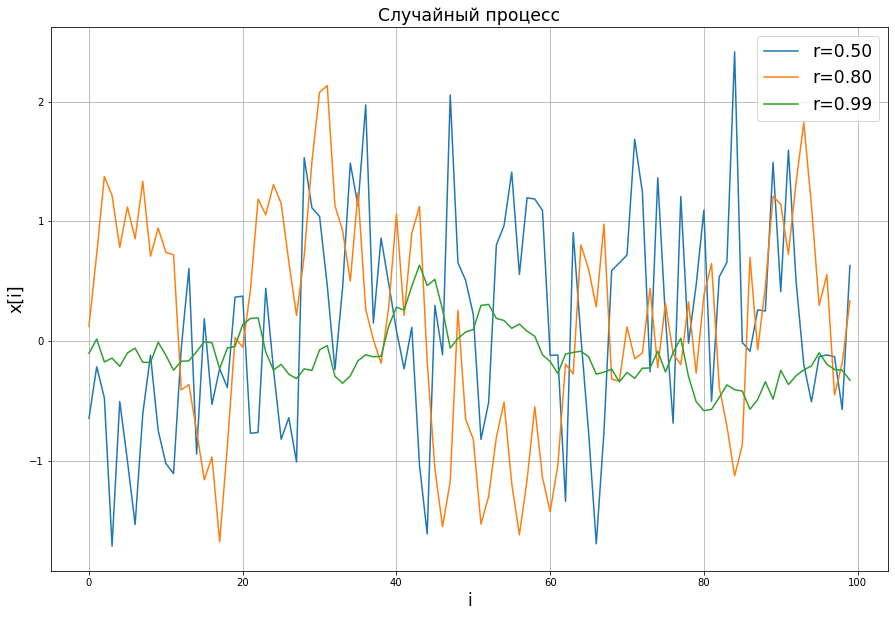

In [29]:
plt.figure(figsize=(15,10))
plt.title("Случайный процесс", fontsize = 'xx-large') #задаем название графика
plt.xlabel("i", fontsize = 'xx-large') #задаем подпись оси Х и меняем шрифт
plt.ylabel("x[i]", fontsize = 'xx-large') #задаем подпись оси Y
for i in range(x.shape[0]):
    plt.plot(x[i], label=f"r={rs[i]:.2f}")
plt.grid()
plt.legend(fontsize = 'xx-large');

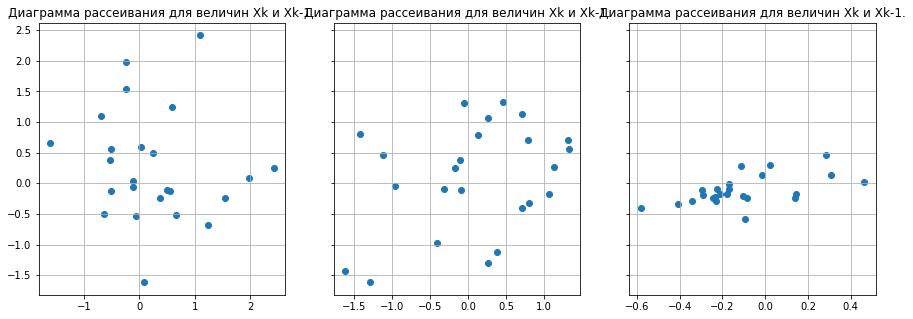

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey='row', figsize=(15,5))

for i in range(x.shape[0]):
    xx = x[i, ::4] #каждый 4й шаг берем
    xs = xx[:-1]
    ys = xx[1:]
    axes[i].scatter(xs, ys)
    axes[i].set_title('Диаграмма рассеивания для величин Xk и Xk-1.')
    axes[i].grid(True)

## Задача 37

Создайте два массива numpy размером 1000 на 1000, заполнив их случайными целыми числами от 1 до 10. Реализуйте с помощью циклов и с помощью numpy подсчет третьего массива так, что элементы этого массива принимают значение произведения элементов массивов 1 и 2 на соответсвующих позициях. Выполните профилирование кода. Сравните время выполнения.

In [34]:
import numpy as np

In [35]:
N = 1000
a = np.random.randint(1,10, (N, N))
b = np.random.randint(1,10, (N, N))

сохраним функции в файл

In [36]:
%%writefile for1.py

import numpy as np

def mul(a, b):
    return a*b

def mul2(a, b):
    result = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            result[i][j] = a[i][j]*b[i][j]
    return result

Writing for1.py


In [37]:
from for1 import (mul, mul2)

In [46]:
#загружаем профайлер
%load_ext line_profiler 

In [47]:
#профайлинг
%lprun -f mul mul(a, b) 

In [48]:
#профайлинг
%lprun -f mul2 mul2(a, b) 

In [49]:
%%timeit
mul(a,b)

4.18 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
%%timeit
mul2(a,b)

2.22 s ± 309 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


решение через циклы в тысчу раз дольше решения через numpy

In [51]:
mul(a,b), mul2(a,b) #проверим совпадают ли результаты (да совпадают)

(array([[40,  1, 12, ..., 16, 10, 20],
        [18, 12, 40, ..., 24, 45, 24],
        [40,  6, 81, ..., 32, 20, 18],
        ...,
        [35,  6, 32, ..., 18, 49, 72],
        [24, 24, 81, ..., 30, 24, 81],
        [63, 54, 18, ...,  8, 24, 20]]),
 array([[40.,  1., 12., ..., 16., 10., 20.],
        [18., 12., 40., ..., 24., 45., 24.],
        [40.,  6., 81., ..., 32., 20., 18.],
        ...,
        [35.,  6., 32., ..., 18., 49., 72.],
        [24., 24., 81., ..., 30., 24., 81.],
        [63., 54., 18., ...,  8., 24., 20.]]))

## Задание 38

Постройте на одном графике 10 кривых A*sin(x), где А = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]. Задайте всем кривым различные цвета и стилевое оформление, добавьте название графика, легенду, подписи осей и сетку.

In [52]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [53]:
A = np.arange(0.05,1,0.1) #задание коэффициентов A с помощью range numpy
x = np.sin(np.arange(-2*np.pi, 2*np.pi, np.pi/24)) #применяем функцию sin(x) на промежутке от -2Pi до  2Pi
colors = matplotlib.cm.tab20(range(10)) #берем из цветовой карты 10 значений цветов (они хорошо различимы)

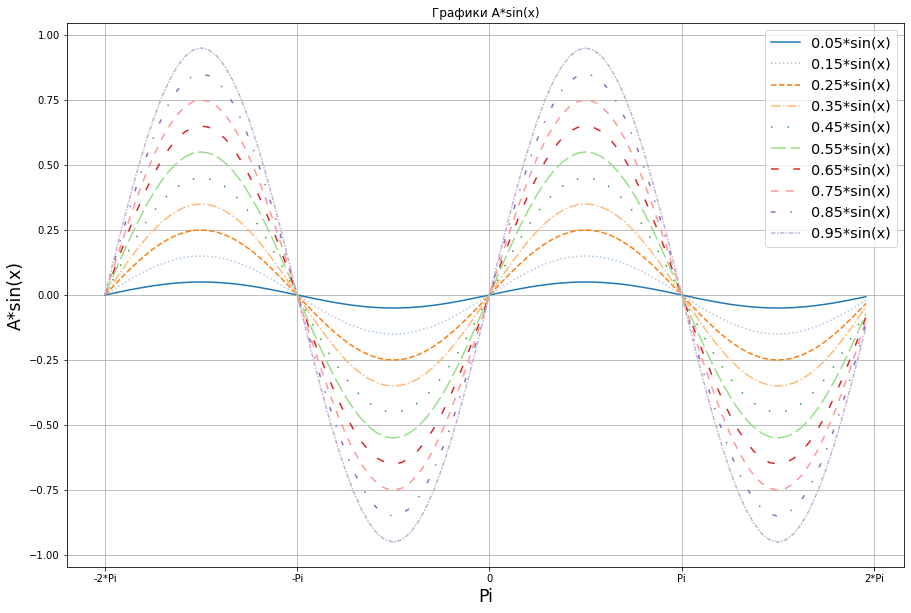

In [54]:
plt.figure(figsize=(15,10)) #задаем размер фигуры
plt.title("Графики A*sin(x)") #задаем название графика
plt.xlabel("Pi", fontsize = 'xx-large') #задаем подпись оси Х и меняем шрифт
plt.ylabel("A*sin(x)", fontsize = 'xx-large') #задаем подпись оси Y
linestyles = [ #создаем различимые стили (10 штук) для каждой линии
    "solid", 
    "dotted",
    "dashed",
    "dashdot",
    (0,(1, 10)),
    (0,(10, 3)),
    (0,(5, 10)),
    (0,(5, 5)),
    (0,(3, 10, 1, 10)),
    (0,(3, 1, 1, 1))
]
for c,a, linestyle in zip(colors, A, linestyles): #обходим наши значения A, цвета и типы линий
    plt.plot(a*x, c=c, label=f"{a:.2f}*sin(x)", linestyle=linestyle) #отрисовываем график функции предварительно домножив ее на A
    #изменяем стандартный цвет на тот, который мы задали, добавляем подпись и меняем стиль линии
plt.grid() #рисуем сетку
plt.xticks(np.arange(5)*x.shape[0]/4, ['-2*Pi', '-Pi', '0', "Pi", "2*Pi"]) #задаем тики по оси Х
plt.legend(fontsize = 'x-large'); #выводим легенду

## Задание 39

Подсчитать, сколько раз встречается каждое из личных местоимений в именительном падеже (полный список: я, ты, он, она, оно, мы, вы, они) в текстовых файлах, лежащих в папке: all_k.zip. Выполнить задание с использованием Dask, распараллелив процесс обработки данных (использоване Dask должно приводить к истинной параллельной обработке данных).

In [56]:
from os import listdir
from os.path import isfile, join
import nltk
from dask import delayed

mypath = "./text" #извлечем все имена файлов из этой папки
textfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))] #сохраним пути к файлам здесь
target_words = ["я", "ты", "он", "она", "оно", "мы", "вы", "они"] #местоимения которые нужно считать

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'text'

In [ ]:
def counter(filename): #Функция подсчета количества вхождений
    with open(filename, "r") as file: #откроем файл на чтение
        textx = file.read() #прочитаем файл
    count = 0 #зададим начальное количество
    words = nltk.word_tokenize(textx) #разобьем текст на слова
    for word in words: #обойдем все слова в тексте
        if word in target_words: #проверим входит ли слово в наш список местоимений
            count+=1 #если да то увеличим число на 1
    return count #вернем колчиество вхождений

In [ ]:
total = delayed(sum)([delayed(counter)(filename) for filename in textfiles]) #распаралелливание процесса для каждого файла
total.compute() #посчет результата

## Задание 40

Датасет: sp500hst.txt. Необходимо создать 2 датафрейма, один по тикеру NVDA, второй по тикеру AAPL. Добавить столбец с разницой Закрытия и Открытия. Отбираем строки тикеров, в которых цена закрытия больше цены открытия.

In [57]:
import pandas as pd

In [58]:
# Загрузка данных из датасета
data = pd.read_csv('./sp500hst.txt', header=None)
data.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
data.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,20090821,A,25.60,25.6100,25.220,25.55,34758
1,20090824,A,25.64,25.7400,25.330,25.50,22247
2,20090825,A,25.50,25.7000,25.225,25.34,30891
3,20090826,A,25.32,25.6425,25.145,25.48,33334
4,20090827,A,25.50,25.5700,25.230,25.54,70176


In [59]:
# Отбор тикера NVDA
nvda = data[data['Ticker'] == 'NVDA']
nvda.head()

,Date,Ticker,Open,High,Low,Close,Volume
80616,20090821,NVDA,13.87,13.95,13.5300,13.93,151858
80617,20090824,NVDA,13.87,14.00,13.4600,13.54,115369
80618,20090825,NVDA,13.58,13.80,13.3800,13.66,111026
80619,20090826,NVDA,13.66,13.85,13.5807,13.82,108580
80620,20090827,NVDA,13.88,14.07,13.7300,14.01,137787


In [60]:
# Отбор тикера AAPL
aapl = data[data['Ticker'] == 'AAPL']
aapl.head()

,Date,Ticker,Open,High,Low,Close,Volume
490,20090821,AAPL,167.81,169.37,166.80,169.22,148597
491,20090824,AAPL,170.00,170.71,168.27,169.06,145331
492,20090825,AAPL,169.43,170.94,169.13,169.40,115840
493,20090826,AAPL,168.94,169.55,166.76,167.41,108570
494,20090827,AAPL,168.59,169.57,164.83,169.45,160421


In [61]:
# Слияние тикеров с помощью функции merge: таким образом выполняется условие отбора торгов в ОДИНАКОВЫЕ дни
df = nvda.loc[:, ['Date', 'Volume']].merge(aapl.loc[:, ['Date', 'Volume']],
                                           left_on='Date',
                                           right_on='Date',
                                           suffixes=('_NVDA', '_AAPL'))
df['Difference'] = df['Volume_NVDA'] - df['Volume_AAPL']
df.head()

,Date,Volume_NVDA,Volume_AAPL,Difference
0,20090821,151858,148597,3261
1,20090824,115369,145331,-29962
2,20090825,111026,115840,-4814
3,20090826,108580,108570,10
4,20090827,137787,160421,-22634


In [62]:
# Слияние тикеров с помощью функции merge: таким образом выполняется условие отбора торгов в ОДИНАКОВЫЕ дни
# Дополнительно с помощью масок отбираются те строки тикеров, в которых выполняется условие маскирования
modified_df = nvda.loc[nvda['Close'] > nvda['Open'], ['Date', 'Volume']].merge(aapl.loc[aapl['Close'] > aapl['Open'], ['Date', 'Volume']],
                                                                               left_on='Date',
                                                                               right_on='Date',
                                                                               suffixes=('_NVDA', '_AAPL'))
modified_df['Difference'] = modified_df['Volume_NVDA'] - modified_df['Volume_AAPL']
modified_df.head()

,Date,Volume_NVDA,Volume_AAPL,Difference
0,20090821,151858,148597,3261
1,20090827,137787,160421,-22634
2,20090902,101174,130143,-28969
3,20090903,133504,105036,28468
4,20090904,128269,133795,-5526


## Задание 41

Написать функцию, которая с помощью регулярных выражений ищет слова, состоящие из букв латинского алфавита в нижнем регистре, разделеннные символом "_", а после него идет один или более "@". Привести примеры и контрпримеры.

In [63]:
import re

In [71]:
def find(string: str):
    # Паттерн построен следующим образом:
    # 1) Граница слова
    # 2) Один или более символов латинского алфавита в нижнем регистре
    # 3) Один символ "_"
    # 4) Один или более символов "@"
    # 5) Один или более символов латинского алфавита в нижнем регистре
    # 6) Граница слова
    pattern = '\\b[a-z]+_@+[a-z]+\\b'
    return re.findall(pattern, string)

    # Паттерн построен следующим образом:
    # 1) Граница слова
    # 2) Один или более символов латинского алфавита в нижнем регистре
    # 3) Один символ "_"
    # 4) Один или более символов "@"
    # 5) Один или более символов латинского алфавита в нижнем регистре
    # 6) Граница слова
    pattern = '\\b[a-z]+_@+[a-z]+\\b'
    return re.findall(pattern, string)

#### Пример

In [72]:
find('w_@ord w_@@ord')

['w_@ord', 'w_@@ord']

#### Контрпример

In [74]:
find('Wo_@rd wo_@rD _word word_ wo_rd @word word@ wo@rd _@word word_@')

[]

## Задание 42

Загрузите данные по курсу произвольного тикера, например, AAPL (c 2017-01-01 по 2018-12-31). Постройте график разности цены закрытия и открытия. Постройте диаграмму рассеяния этих показателей. Сделайте выводы.

In [75]:
import pandas as pd

In [76]:
# считываем данные
data = pd.read_csv('sp500hst.txt')
# заменяем название столбцов
cols = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
data.columns = cols
# заменяем формат даты
data['Date'] = pd.to_datetime(data["Date"], format='%Y%m%d')
# выводим 5 случайных строк датафрейма
data.sample(5)

,Date,Ticker,Open,High,Low,Close,Volume
56321,2010-05-13,INTC,23.02,23.17,22.36,22.50,620989
74566,2009-12-14,MRO,32.26,32.37,31.43,31.45,60117
31373,2010-05-24,DHR,79.34,79.79,78.66,78.73,19957
116611,2010-03-26,WFR,14.76,15.05,14.46,14.68,59190
106283,2010-08-17,TE,16.57,16.99,16.47,16.76,24947


In [77]:
# смотрим на столбец 
data['Ticker']

0           A
1           A
2           A
3           A
4           A
         ... 
122568    ZMH
122569    ZMH
122570    ZMH
122571    ZMH
122572    ZMH
Name: Ticker, Length: 122573, dtype: object

In [78]:
# выбираем все значения с тикером AAPL
nvda = pd.DataFrame(data[data['Ticker'] == 'AAPL'].reset_index(drop=True))
nvda.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,2009-08-21,AAPL,167.81,169.37,166.80,169.22,148597
1,2009-08-24,AAPL,170.00,170.71,168.27,169.06,145331
2,2009-08-25,AAPL,169.43,170.94,169.13,169.40,115840
3,2009-08-26,AAPL,168.94,169.55,166.76,167.41,108570
4,2009-08-27,AAPL,168.59,169.57,164.83,169.45,160421


In [79]:
# отбор промежутка по дате
start = nvda[nvda['Date'].dt.strftime('%Y%m%d') >= '2009-10-01']
end = start[start['Date'].dt.strftime('%Y%m%d') <= '2010-01-01']
end.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,2009-08-21,AAPL,167.81,169.37,166.80,169.22,148597
1,2009-08-24,AAPL,170.00,170.71,168.27,169.06,145331
2,2009-08-25,AAPL,169.43,170.94,169.13,169.40,115840
3,2009-08-26,AAPL,168.94,169.55,166.76,167.41,108570
4,2009-08-27,AAPL,168.59,169.57,164.83,169.45,160421


In [80]:
# создаине нового столбца
end['difference'] = end['Close']-end['Open']
end.head()

<ipython-input-80-6008f39d1542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end['difference'] = end['Close']-end['Open']


,Date,Ticker,Open,High,Low,Close,Volume,difference
0,2009-08-21,AAPL,167.81,169.37,166.80,169.22,148597,1.41
1,2009-08-24,AAPL,170.00,170.71,168.27,169.06,145331,-0.94
2,2009-08-25,AAPL,169.43,170.94,169.13,169.40,115840,-0.03
3,2009-08-26,AAPL,168.94,169.55,166.76,167.41,108570,-1.53
4,2009-08-27,AAPL,168.59,169.57,164.83,169.45,160421,0.86


In [81]:
# импорт библиотек
import seaborn as sns

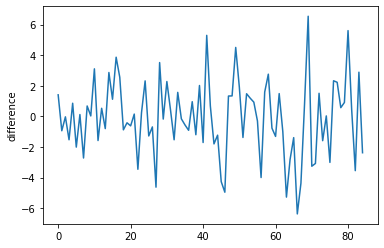

In [82]:
# построение графика
sns.lineplot(data=end['difference']);

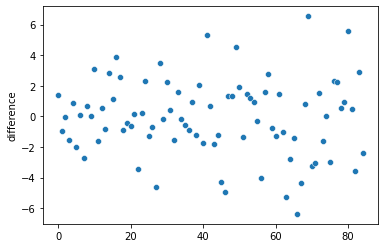

In [83]:
# построение графика
sns.scatterplot(data=end['difference']);

## Задание 43

Подсчитать, сколько раз в текстовых файлах, лежащих в all_k.zip (ExamData), встречаются предложения трех видов: вопроситьельные (в окончании имеют вопросительный знак), побудительные (в окончании имеют восклицательный знак и не имеют вопросительного) и повествовательные (в окончании имеют точку или троеточие, при этом нужно исключить учет точек, встречающихся в сокращениях, таких как "т.к.").

In [84]:
import dask.bag as db
import re

def counter_test(data):
    return len(re.findall('\d', data))

def counter1(data):
    return len(re.findall('\?+\s', data))

def counter2(data):
    return len(re.findall('\!+\s', data))

def counter3(data):
    return len(re.findall('\.+\s', data))

def counter4(data):
    return len(re.findall('\.\.\.\s', data))

bag = db.read_text(urlpath='all_k.zip', encoding='Windows-1251')
bag.map(counter_test).sum().compute()

0

## Задача 43

Задани двухмерный массив ar1 размерности (25, 4) состоящий из случайных целых чисел в пределах от 0 до 15. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке (вывести индексы этих столбцов на экран с соответсвующих комментарием). Для столбца, в котором таких значений наибольшее количество, заменить максимумы по строке на значения -1. Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.

In [85]:
import numpy as np

In [86]:
ar1 = np.random.randint(0,15,(25,4))
mx = ar1.max(axis=1)
mask = ar1 == ar1.max(axis=1)[:, np.newaxis]

In [87]:
mask.sum(axis=0)

array([8, 8, 6, 6])

In [88]:
np.arange(4)[mask.sum(axis=0) > 5]

array([0, 1, 2, 3])

In [89]:
argmax = mask.sum(axis=0).argmax()
argmax

0

In [90]:
ar1[mask[:, argmax], argmax] = -1

In [91]:
ar1

array([[ 5,  5,  7,  9],
       [-1,  1,  9,  3],
       [ 5, 14, 10, 11],
       [ 6, 13,  8, 10],
       [-1, 11,  0,  5],
       [-1, 10, 12,  8],
       [10,  2, 14, 12],
       [ 5, 12,  6, 12],
       [-1,  7,  4,  3],
       [12, 14,  2,  7],
       [ 4,  1, 14,  2],
       [-1,  8,  8,  6],
       [-1,  8, 11,  6],
       [ 4,  8,  1,  3],
       [ 2,  1,  8,  9],
       [ 2,  1, 10,  6],
       [ 3,  2, 13, 12],
       [ 5,  1,  6, 10],
       [ 0, 10,  2,  9],
       [ 4, 12, 10, 11],
       [ 3,  7,  6,  7],
       [ 8,  5, 13,  8],
       [-1,  3, 11,  8],
       [-1,  3,  2,  9],
       [ 5,  7,  2, 10]])

#### еще один вариант

In [1]:
import numpy as np

In [2]:
#решение никиты 
ar1 = np.random.randint(0, 15, (25, 4))
ar1

array([[ 2, 14,  9,  8],
       [ 4,  8,  9,  5],
       [12, 12,  4, 12],
       [ 0, 13, 11,  0],
       [14,  9,  3,  7],
       [14,  6, 13,  6],
       [ 3,  1,  8,  6],
       [ 3,  6,  7,  2],
       [ 8, 11,  6,  1],
       [12,  1, 10,  2],
       [11,  9,  2,  6],
       [ 9, 10,  6, 10],
       [13,  8, 12,  7],
       [ 3, 10,  4, 11],
       [ 0,  0,  7,  3],
       [14,  5, 11,  4],
       [13, 12,  8, 10],
       [13,  1,  8,  8],
       [ 8, 11,  1,  1],
       [12,  3, 11, 14],
       [ 9,  7,  0, 10],
       [ 1,  6,  0,  5],
       [ 4, 13,  6,  8],
       [10, 11, 14, 11],
       [ 0,  3, 12,  1]])

In [3]:
rows_max_values = ar1.max(axis=1)
columns_counts = (ar1 == rows_max_values.reshape(-1, 1)).sum(axis=0)
columns_counts

array([9, 8, 6, 5])

In [4]:
np.where(columns_counts >= 5)[0]

array([0, 1, 2, 3], dtype=int64)

В этом случае получились индексы _ _ _ потому что в этих столбцах встречается не менее 5 максимумов в соответствующей строке: _ _ _ соответственно.

In [5]:
columns_counts_max_index = columns_counts.argmax()
column_with_max_counts = ar1[:, columns_counts_max_index]

In [6]:
column_with_max_counts[
    column_with_max_counts == ar1.max(axis=1)] = -1

In [7]:
ar1

array([[ 2, 14,  9,  8],
       [ 4,  8,  9,  5],
       [-1, 12,  4, 12],
       [ 0, 13, 11,  0],
       [-1,  9,  3,  7],
       [-1,  6, 13,  6],
       [ 3,  1,  8,  6],
       [ 3,  6,  7,  2],
       [ 8, 11,  6,  1],
       [-1,  1, 10,  2],
       [-1,  9,  2,  6],
       [ 9, 10,  6, 10],
       [-1,  8, 12,  7],
       [ 3, 10,  4, 11],
       [ 0,  0,  7,  3],
       [-1,  5, 11,  4],
       [-1, 12,  8, 10],
       [-1,  1,  8,  8],
       [ 8, 11,  1,  1],
       [12,  3, 11, 14],
       [ 9,  7,  0, 10],
       [ 1,  6,  0,  5],
       [ 4, 13,  6,  8],
       [10, 11, 14, 11],
       [ 0,  3, 12,  1]])

#### еще один вариант

In [44]:
import numpy as np

In [45]:
#рандомные значение от -5 до 5 с размером 10 на 4
ar1 = np.random.choice(np.arange(-5, 5), size=(10,4)) 
ar2 = np.random.choice(np.arange(-5, 5), size=(10,4))

In [46]:
ar1

array([[ 3,  3, -3,  3],
       [-3, -2, -3,  2],
       [ 3, -4,  1, -3],
       [-1, -3, -2,  1],
       [ 4, -3, -5, -2],
       [-5,  0,  3, -1],
       [-1,  1,  3, -5],
       [ 4,  1,  2, -3],
       [ 4,  4,  3,  1],
       [ 0,  1, -1,  3]])

In [47]:
ar2

array([[-2,  2, -2, -2],
       [ 1,  1,  1, -5],
       [ 3,  3, -3,  3],
       [-3, -1, -2, -1],
       [-2,  1, -1,  0],
       [-3, -2, -5,  4],
       [ 2, -3, -3,  1],
       [ 3, -3, -3, -2],
       [ 1,  0, -1,  1],
       [ 0, -4,  1, -3]])

In [48]:
#выполнение условия и результат обработки
np.array([ar1[i][j]*2 if ar1[i][j] > ar2[i][j] else 0 for i in range(ar1.shape[0]) for j in range(ar1.shape[1])]).reshape(10, 4)


array([[ 6,  6,  0,  6],
       [ 0,  0,  0,  4],
       [ 0,  0,  2,  0],
       [-2,  0,  0,  2],
       [ 8,  0,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  2,  6,  0],
       [ 8,  2,  4,  0],
       [ 8,  8,  6,  0],
       [ 0,  2,  0,  6]])

In [49]:
#рандомные значение от -5 до 5 с размером 10 на 4
ar1 = np.random.choice(np.arange(0, 15), size=(10,4)) 

In [50]:
ar2 = np.array

In [51]:
ar2 = ar1.copy()

In [52]:
ar2

array([[ 4,  5, 10,  9],
       [ 2,  6,  3,  5],
       [ 1,  0,  7,  8],
       [12,  9, 14,  2],
       [10,  5,  0, 10],
       [ 4, 14,  7,  5],
       [11,  0,  8,  3],
       [ 0,  2, 10,  1],
       [10, 12,  1,  7],
       [11, 11,  9, 13]])

In [53]:
ar2[:,0][1]

2

In [54]:
ar1

array([[ 4,  5, 10,  9],
       [ 2,  6,  3,  5],
       [ 1,  0,  7,  8],
       [12,  9, 14,  2],
       [10,  5,  0, 10],
       [ 4, 14,  7,  5],
       [11,  0,  8,  3],
       [ 0,  2, 10,  1],
       [10, 12,  1,  7],
       [11, 11,  9, 13]])

In [55]:
ar2[:,0][ar2[:,0] != ar2[:,0].max()] = 0

In [56]:
ar2[:,1][ar2[:,1] != ar2[:,1].max()] = 0
ar2[:,2][ar2[:,2] != ar2[:,2].max()] = 0
ar2[:,3][ar2[:,3] != ar2[:,3].max()] = 0

In [57]:
ar2

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [12,  0, 14,  0],
       [ 0,  0,  0,  0],
       [ 0, 14,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0, 13]])

In [58]:
ar2[:,3].sum()/ar2[:,3].max()

1.0

## Задача 44

датасет: себестоимостьА_в1.xlsx. С помощью кода на Python с использованием xlwings решить задачу. Вынести "Наименвание продукции" (из всех таблиц на листе Рецептура) и соответсвующие им значения "Доля" в новую таблицу на новом листе "Наименование". Значения из столбца "Доля" выбирать, не указывая явно в каком столбце для данной таблицы на листе "Рецептура" находится "Доля" (делать динамически, в зависимости от ширины каждой из таблиц).

In [92]:
import xlwings as xw
import numpy as np
import pandas as pd
from xlwings import constants 

In [93]:
wb = xw.Book('себестоимостьА_в1.xlsx')
recipies = wb.sheets['Рецептура']

In [94]:
data = recipies.range("A1:AD75").options(np.array).value
top_right_address = zip(*np.where(data == 'Доля'))
bot_left_address = zip(*np.where(data == 'Размерность физических единиц'))
top_right_bot_left_address = zip(top_right_address,bot_left_address)
recipe_ranges = [((top, left+1), (bottom+1, right+2)) for ((top, right),(bottom, left)) in top_right_bot_left_address]
recipe_ranges

[((3, 2), (16, 20)),
 ((19, 2), (33, 19)),
 ((36, 2), (54, 29)),
 ((57, 2), (75, 30))]

In [95]:
ranges = [recipies.range(*address) for address in recipe_ranges]
ranges

[<Range [себестоимостьА_в1.xlsx]Рецептура!$B$3:$T$16>,
 <Range [себестоимостьА_в1.xlsx]Рецептура!$B$19:$S$33>,
 <Range [себестоимостьА_в1.xlsx]Рецептура!$B$36:$AC$54>,
 <Range [себестоимостьА_в1.xlsx]Рецептура!$B$57:$AD$75>]

In [96]:
d = dict()

In [97]:
for range1 in ranges:
    d.update(zip(range1[4:-3,1].value, range1[4:-3,-2].value))
del d[None]

In [98]:
nn = wb.sheets.add(name="Наименование", after=wb.sheets[0].name)

In [99]:
nn.range((1,1)).value = d

## Задача 45

В массиве чисел, хранящихся в файле random.hdf5 (ExamData), подсчитать количество значений, не отклоняющихся от среднего значения более чем на 3 стандартных отклонения. Выполнить задание с использванием dask.array, распараллелив процесс обработки данных.

## Задача 46

Для файла себестоимостьА_в1.xlsx на листе "Рецептура" для области "Хлеба специальной рецептуры" рассчитать себестоимость всех видов продукции, добавив формулу в соотвествующие ячейки через xlwings. Раскрасьте ячейку с наименованием самого дорого по себестоимости хлеба красным цветом.

## Задача 47

Построить "one-hot encoding" для одномерного массива numpy из целых неотрицательных чисел (длина массива и максимальное значение в массиве заранее неизвестно). Протестировать свое решение на случайно сгенерированном одномерном массиве, соответсвующем условию. Пример "one-hot encoding": для вектора 'n[.array([2,3,2,2,2,1])]' ожидается результат:

Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.

In [23]:
import numpy as np
import random

In [24]:
# тут указываем максимальное возможное число
max_int = 10

# генерируем случайный массив целых неотрицательных чисел случайного размера
BaseArray = np.random.randint(random.randint(1,max_int), size=random.randint(1,max_int))

In [25]:

# реализуем one-hot encoding
OneHotArray = np.zeros((BaseArray.size, BaseArray.max() + 1))
OneHotArray[np.arange(BaseArray.size), BaseArray] = 1

In [26]:
print(f"До: \n{BaseArray}")

До: 
[0 0 0 0 0 0]


In [27]:
print(f"После: \n{OneHotArray}")

После: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Билет0 другое

## 1 Задание

Решите матричное уравнение   алгебраически и средствами numpy. 
Выполните проверку решения.

1. Решите матричное уравнение  алгебраически и средствами numpy. Выполните проверку решения.
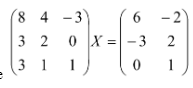

In [1]:
import numpy as np
from numpy import linalg as LA

a = [[8, 4, -3],
     [3, 2, 0],
     [3, 1, 1]]

b = [[6, -2],
     [-3, 2],
     [0, 1]]

x = LA.solve(a, b)
x

array([[ 2.53846154, -0.92307692],
       [-5.30769231,  2.38461538],
       [-2.30769231,  1.38461538]])

#### Выполним проверку

In [2]:
np.dot(a, x)

array([[ 6.0000000e+00, -2.0000000e+00],
       [-3.0000000e+00,  2.0000000e+00],
       [ 8.8817842e-16,  1.0000000e+00]])

## 2 Задание

Сгенерировать вектор X из N = 20 000 равномерных случайных чисел в диапазоне [-10, 10]. Для данного вектора в сетке 2x1 построить (с оформлением всех подписей, легенд и сетки): секторную диаграмму для участков [-10; -7), [-7; -4) и т.д.; построить график функции  .

In [3]:
from numpy import random
import numpy as np

In [4]:
x = random.choice([i for i in range(-10, 10)], size=(20000))

In [5]:
import matplotlib.pyplot as plt

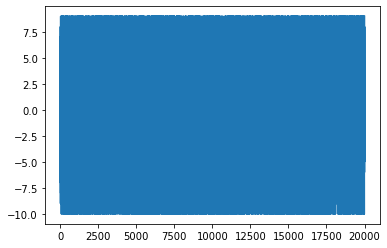

In [6]:
plt.plot(x)

#### еще один вариант

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import math

X = np.random.randint(-10,10,20000)
X.sort()
X

array([-10, -10, -10, ...,   9,   9,   9])

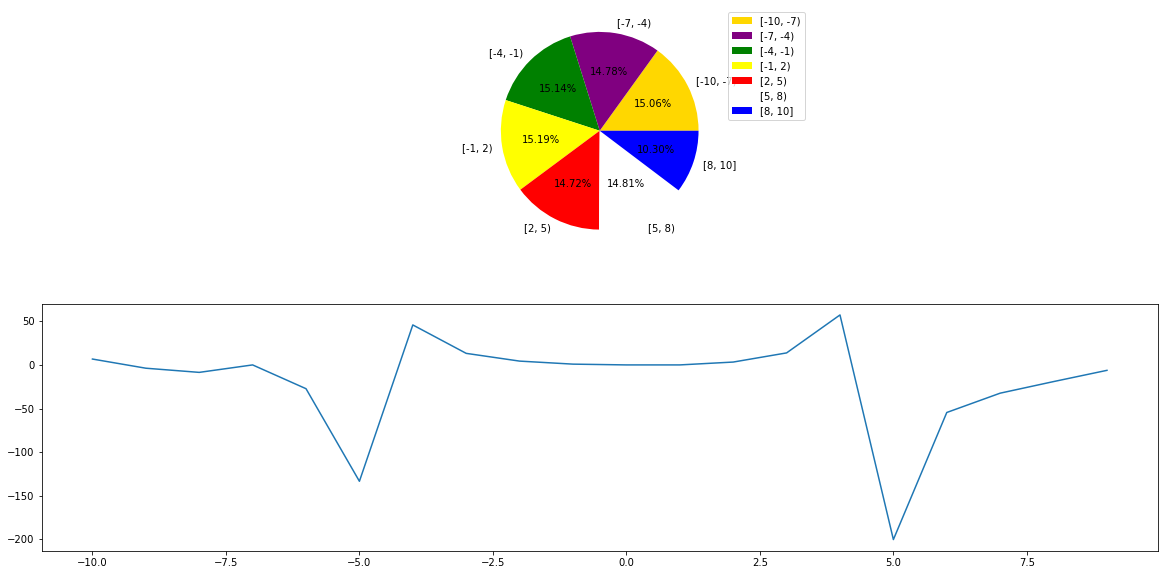

In [60]:
fig, ax = plt.subplots(2,1,  figsize = (20,10))
vals = [0, 0, 0, 0, 0, 0, 0]
values = X

for i in range(0, len(values)):
    if (values[i] < -7):
        vals[0]+= 1
    elif (values[i] >= -7 and values[i] < -4):
        vals[1] += 1
    elif (values[i] >= -4 and values[i] < -1):
        vals[2] += 1
    elif (values[i] >= -1 and values[i] < 2):
        vals[3] += 1
    elif (values[i] >= 2 and values[i] < 5):
        vals[4] += 1
    elif (values[i] >= 5 and values[i] < 8):
        vals[5] += 1
    elif (values[i] >= 8):
        vals[6] += 1

labels = ['[-10, -7)', '[-7, -4)', '[-4, -1)', '[-1, 2)', '[2, 5)', '[5, 8)', '[8, 10]']
ax[0].pie(vals, autopct = '%1.2f%%', labels = labels, colors = ['gold', 'purple','green', 'yellow', 'red', 'white', 'blue'])
ax[0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=labels)
ax[1].plot(X, 2*X*np.log((abs(X**2+6*X-8))**(0.5))*np.tan(X/3))
plt.show()

## 3 Задание

Для файла participants.csv (ЛР 07) напишите функцию, которая по обязательному параметру Country и необязательному параметру City находит все соответствия без учёта регистра и сохраняет полученный результат в файл output.csv. Использовать модуль pandas.

In [61]:
import pandas as pd

data = pd.read_csv('participants.csv', sep=';')
def sootvetstviya (Country, city='null'):
    if city == 'null':
        data_res = (data['Country'].str.lower()==Country.lower())
    else:
        data_res = ((data['Country'].str.lower()==Country.lower()) & (data['City'].str.lower() == city.lower()))
    data[data_res].to_csv('output.csv')
    res = pd.read_csv('output.csv')

sootvetstviya('UNITED Kingdom', 'London')

FileNotFoundError: [Errno 2] No such file or directory: 'participants.csv'

## 4 Задание

Превратить информацию из addres-book.xml (ЛР 07) в json файл с содержимым вида: [{'birthday': date1, 'email': 'email1', 'name': name1}, …].

In [62]:
from bs4 import BeautifulSoup
with open('addres-book.xml') as file:
    soup = BeautifulSoup(file,"xml")

result_list = []
for address in soup.find_all('address'):
    user_name = address.find("name").get_text()
    email = address.find("email").get_text()
    birthday = address.find("birthday").get_text()
    phone = [phones.next for phones in address.phones.find_all('phone')]
    try:
        work = address.find("work").get_text()
        result_list.append({"birthday": birthday,"email": email,"name": user_name,"phone": phone, "work": work})
    except AttributeError:
        result_list.append({"birthday": birthday,"email": email,"name": user_name,"phone": phone})

result_list


[{'birthday': '11.07.1984',
  'email': 'bruce@gmail.com',
  'name': 'Bruce Lee',
  'phone': ['232-17-45', '+7 (912) 212-34-12']},
 {'birthday': '22.03.1985',
  'email': 'alee@yandex.ru',
  'name': 'Alice Lee',
  'phone': [],
  'work': 'John&son'}]

In [63]:
import json
with open('addres-book.json', "w", encoding="utf-8") as file:
    json.dump(result_list, file)

## 5 Задание

Создайте текстовый файл с текстами трех анекдотов про Петьку и Василия Ивановича (выбрать произвольно). Векторизуйте полученный набор текстов с помощью TF-IDF (к ответу приложить также исходный файл).

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

with open("petka.txt", "r", encoding='utf-8') as file:
    data = file.read()

data = data.split("\n")
df = pd.DataFrame(data)

tfidf = pd.DataFrame(vectorizer.fit_transform(df[0]).toarray(), columns=vectorizer.vocabulary_)
tfidf

FileNotFoundError: [Errno 2] No such file or directory: 'petka.txt'

## 6 Задание

Для датасета себестоимостьА_в1.xlsx  (ЛР 08) с помощью кода на Python с использованием xlwings решить задачу. Вынести "Наименование продукции" (из всех таблиц на листе Рецептура) и соответствующие им значения "Доля" в новую таблицу на новом листе "Наименование".

In [65]:
import xlwings as xw
import numpy as np
wb1 = xw.Book(r"себестоимостьА_в1.xlsx")
sheet_rep = wb1.sheets["Рецептура"]
name1 = sheet_rep.range("C7:C10").options(np.array).value
name2 = sheet_rep.range("C23:C25").options(np.array).value
name3 = sheet_rep.range("C40:C46").options(np.array).value
name4 = sheet_rep.range("C61:C69").options(np.array).value
name = np.hstack((name1,name2,name3,name4))
part1 = sheet_rep.range("S7:S10").options(np.array).value
part2 = sheet_rep.range("R23:R25").options(np.array).value
part3 = sheet_rep.range("AB40:AB46").options(np.array).value
part4 = sheet_rep.range("AC61:AC69").options(np.array).value
part = np.hstack((part1,part2,part3,part4))
new_list = wb1.sheets.add(name="Наименование", after=wb1.sheets[0].name)
new_list.range("A1").value = "Наименование продукции"
new_list.range("B1").value = "Доля"
new_list.range("A2:A23").options(transpose=True).value = name
new_list.range("B2:B23").options(transpose=True).value = part


## 7 Задание

В текстовом файле «Война и мир.txt» определить 35 самых редких слов в тексте (вывести на экран эти слова и их частоты). Выполнить их стемминг. Вывести эти слова на экран.

In [66]:
# открыли файл, прочитали, привели текст к нижнему регистру, убрали
# знаки пунктуации, получили список слов (цифры и иже не учитываем)
with open(r'petka.txt') as f:
    lst = f.read().lower().translate(
      str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—')
   ).split()
# составляем словарь подсчёта (падежи, к слову, также не учитываются)
res = {x:lst.count(x) for x in lst}
ans = []
for i in range(35):
    c = (min(res, key=res.get))
    res.pop(min(res, key=res.get))
    ans.append(c)
ans

FileNotFoundError: [Errno 2] No such file or directory: 'petka.txt'

## 8 Задание

В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений между 1300 и 1400. Выполнить задание с использованием Dask, распараллелив процесс обработки данных.

In [67]:
import dask
import dask.dataframe as dd
from dask import delayed
df = dd.read_csv('accounts.csv')
df.compute()
# print(df.head())
def find_values_by_id(id):
    temp = ((df['id'] == id) & ((df['amount'] >= 1300) & (df['amount'] <= 1400)))
    # print(sum(temp==True))
    return (sum(temp == True))

id_list = list(df['id'].unique().compute())

ans = []
for i in id_list:
    y = delayed(find_values_by_id)(i)
    ans.append(y)

total = delayed(max)(ans)

total.compute()

FileNotFoundError: [WinError 2] Не удается найти указанный файл: 'C:/Users/vanif/Downloads/accounts.csv'

## 9 Задание

Необходимо найти все пары целых чисел от 1 до 3000, для которых sin от произведения чисел из пары будет иметь значение больше 0.99999999 (например, sin(237∗1544)=0.9999999951152019>0.99999999; sin(237∗1544)=0.9999999951152019>0.99999999). Ответ представляет собой список пар (целое число1, целое число2, значение синуса для из произведения), для которых значение синуса удовлетворяет условию. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.

## 10 Задание

Подсчитать, сколько раз встречается каждый из знаков препинания в текстовых файлах, лежащих в all_k.zip (ExamData).  Выполнить задание с использованием Dask, распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

In [69]:
import dask
import dask.dataframe as dd
from dask import delayed
import re
import string

with open("idiot.txt", "r", encoding='utf-8') as file:
    idiot = file.read()

with open("igrok.txt", "r", encoding='utf-8') as file:
    igrok = file.read()

with open("besy.txt", "r", encoding='utf-8') as file:
    besy = file.read()

def find_dots(text):
    count = 0
    for i in text:
        if i in string.punctuation:
            count+=1 
    return(count)

a = delayed(find_dots)(idiot)
b = delayed(find_dots)(besy)
c = delayed(find_dots)(igrok)

total = delayed(max)([a, b, c])

total.compute()

FileNotFoundError: [Errno 2] No such file or directory: 'idiot.txt'

с помошью регулярок отобрать значения где выражения числовые и вывести все то что внутри скобок типа есть 123 12124 (1234 214312 1234 1214) 12341 и вывести то что внутри скобок

In [ ]:
import re
text = '123 12124 (123 1243 12341 234) 12341'
print( ' '.join(re.findall(r'\(([^()]+)\)', text)) )

## 11 Задание

Написать функцию, рассчитывающую i-й член ряда обратных квадратов (https://w.wiki/cWU). Векторизовать функцию с помощью numpy и сравнить скорость с векторизацией функции с помощью numba.

In [70]:
import numpy as np
import numba
import time

def obr_squar(x):
    return (1/x**2)

X = np.arange(1,10000,1)
X_vec_nump = np.vectorize(obr_squar)
X_vec_numb = numba.vectorize(obr_squar)


In [71]:
%%time
print(X_vec_nump(X))

[1.00000000e+00 2.50000000e-01 1.11111111e-01 ... 1.00060027e-08
 1.00040012e-08 1.00020003e-08]
Wall time: 6.98 ms
